In [16]:
import os
import operator
import math

import matplotlib
import networkx

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare

In [17]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [18]:
DATASETS = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST']
OVERLAPS = ['nonoverlaping_balanced', 'nonoverlaping_imbalanced', 'overlaping_balanced', 'overlaping_imbalanced']
ALGOS = ['briggs', 'sattler', 'kmeans', 'affinity', 'meanshift', 'HDBSCAN']

#EXPERIMENTS = ['experiment1A', 'experiment1B', 'experiment1C']
EXPERIMENTS = ['experiment1A']
EXPERIMENTS_ROOT = os.path.join(os.getcwd(), 'explanations')
ALGO_NAME_MAPPING = {
    'briggs': 'BCL',
    'sattler': 'SCL',
    'kmeans': 'OCFL-KM',
    'affinity': 'OCFL-AFF',
    'meanshift': 'OCFL-MS',
    'HDBSCAN': 'OCFL-HDBS'
}
SPLIT_NAME_MAPPING = {
    'nonoverlaping_balanced': 'NON-OVERLAPPING BALANCED',
    'nonoverlaping_imbalanced': 'NON-OVERLAPPING IMBALANCED',
    'overlaping_balanced': 'OVERLAPPING BALANCED',
    'overlaping_imbalanced': 'OVERLAPING IMBALANCED',
}

In [21]:
GENERAL_RATIO = set_size(width='thesis', fraction=3.0)
SPECIAL_RATIO = set_size(width='thesis', fraction=4.0)

Y_LABEL_FONT = 13
X_LABEL_FONT = 13
TITLE_FONT = 15
ANOT_FONT = 10

# Section I: Boxplots for particular clusters

## Experiment A (In-Distribution)

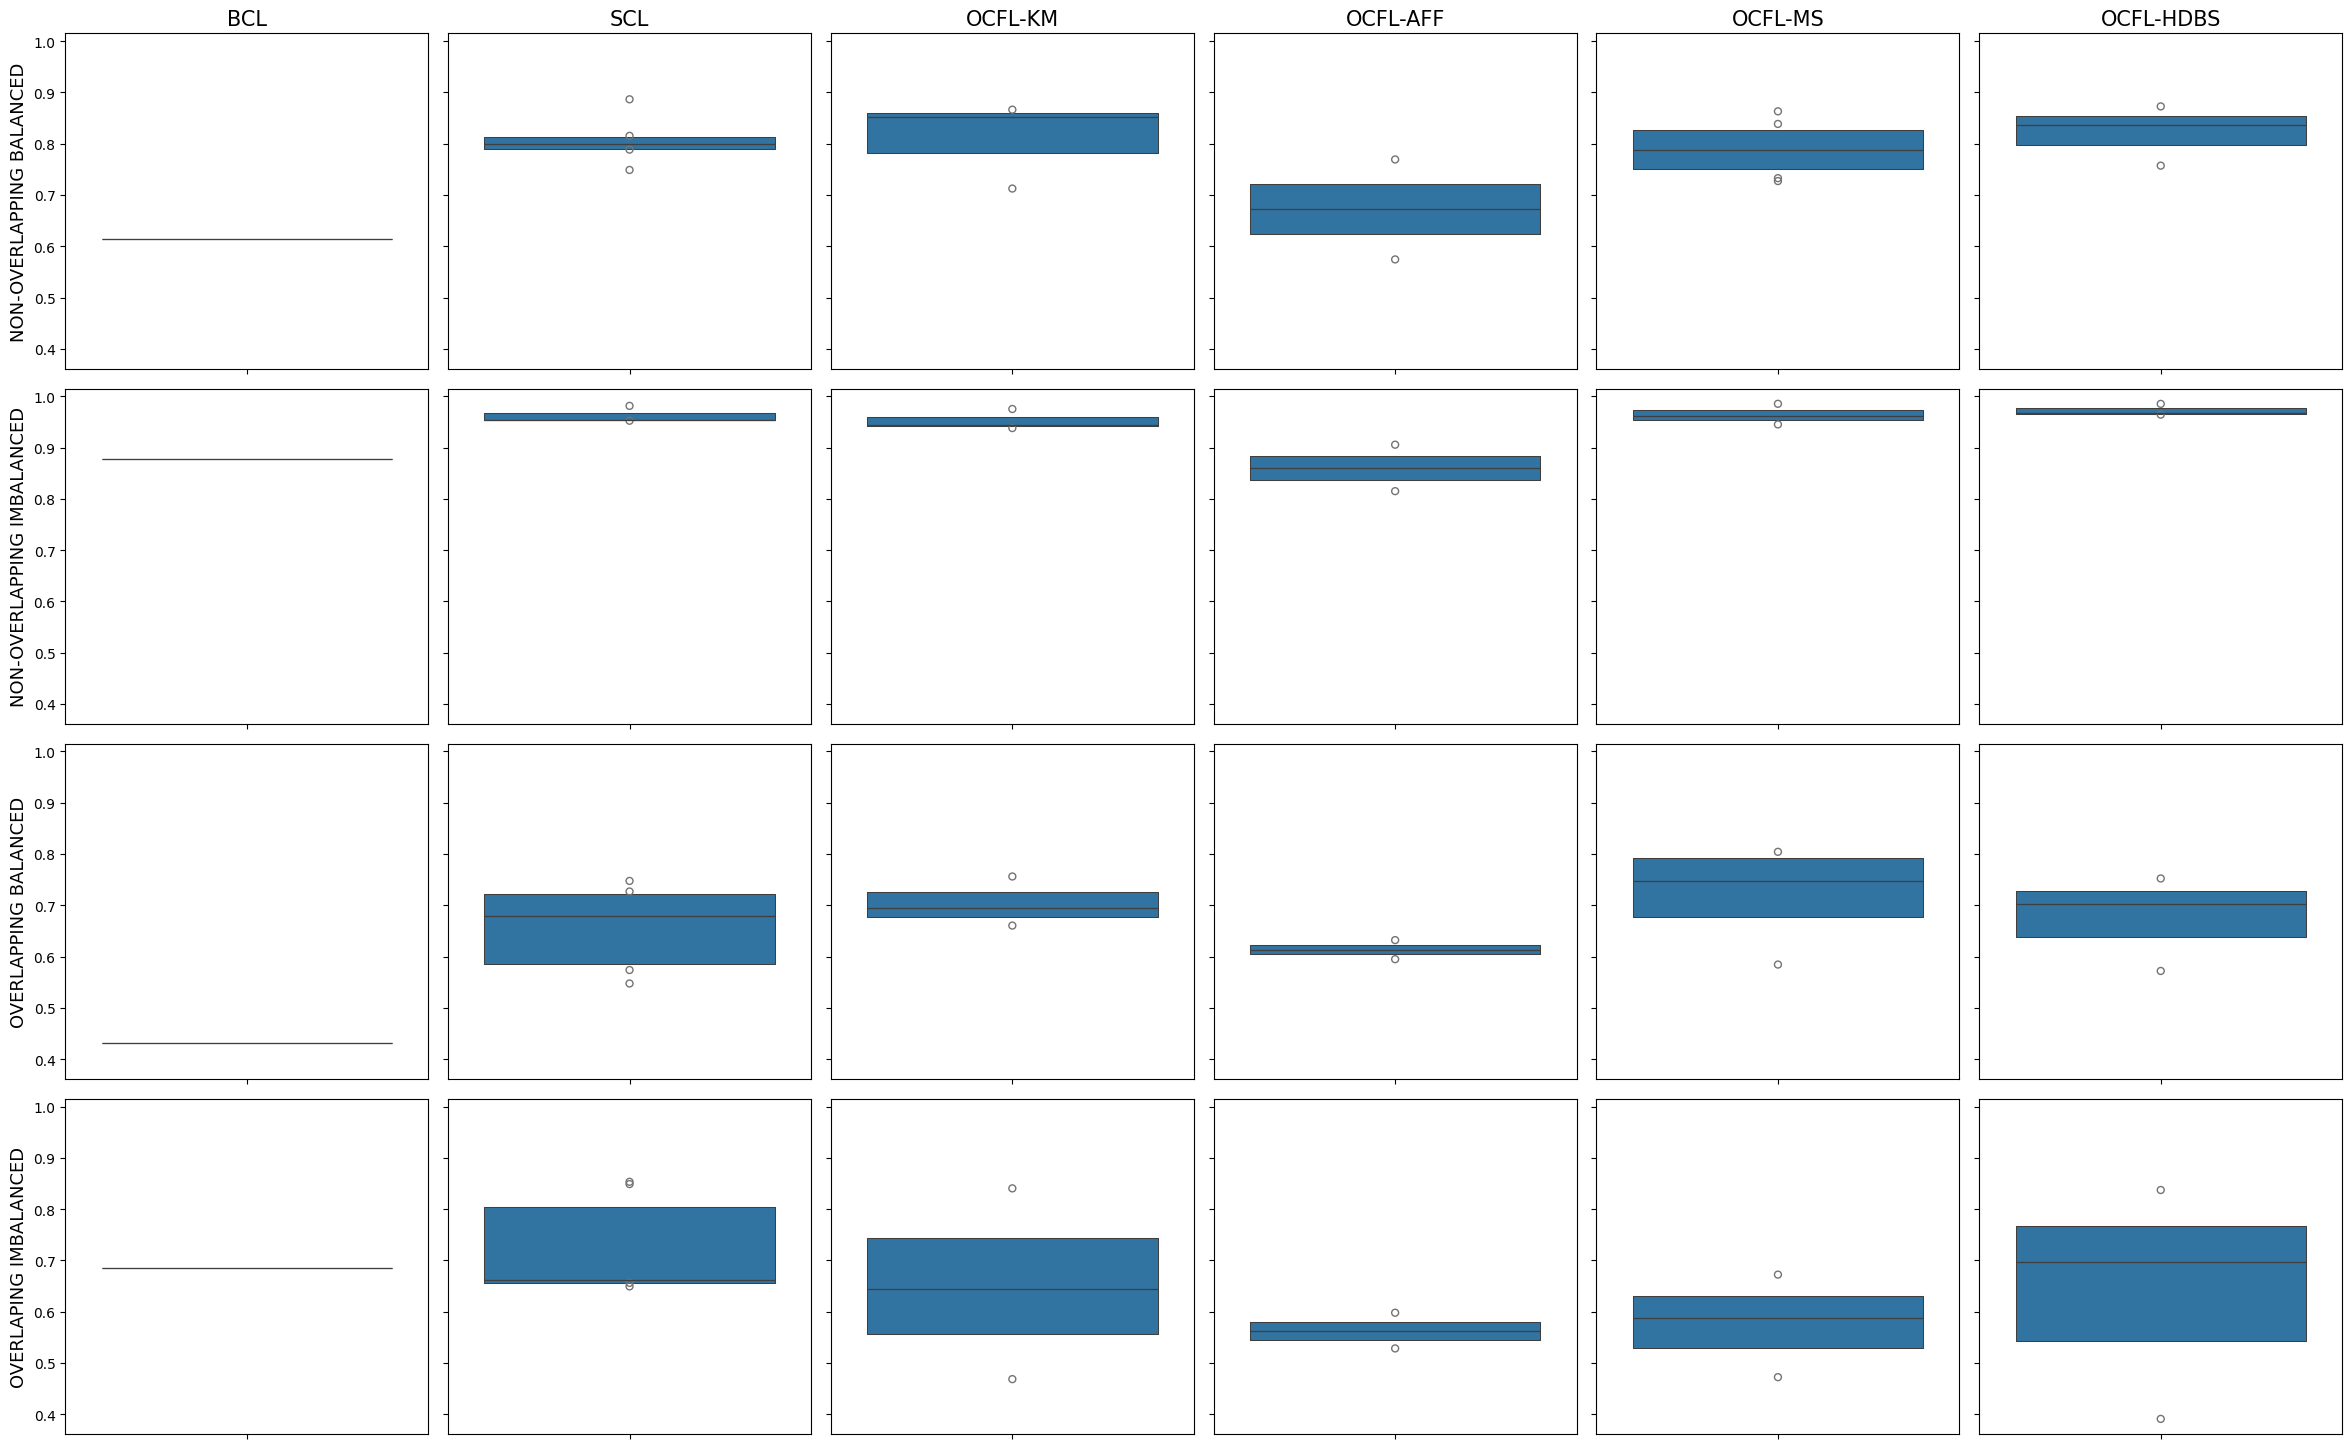

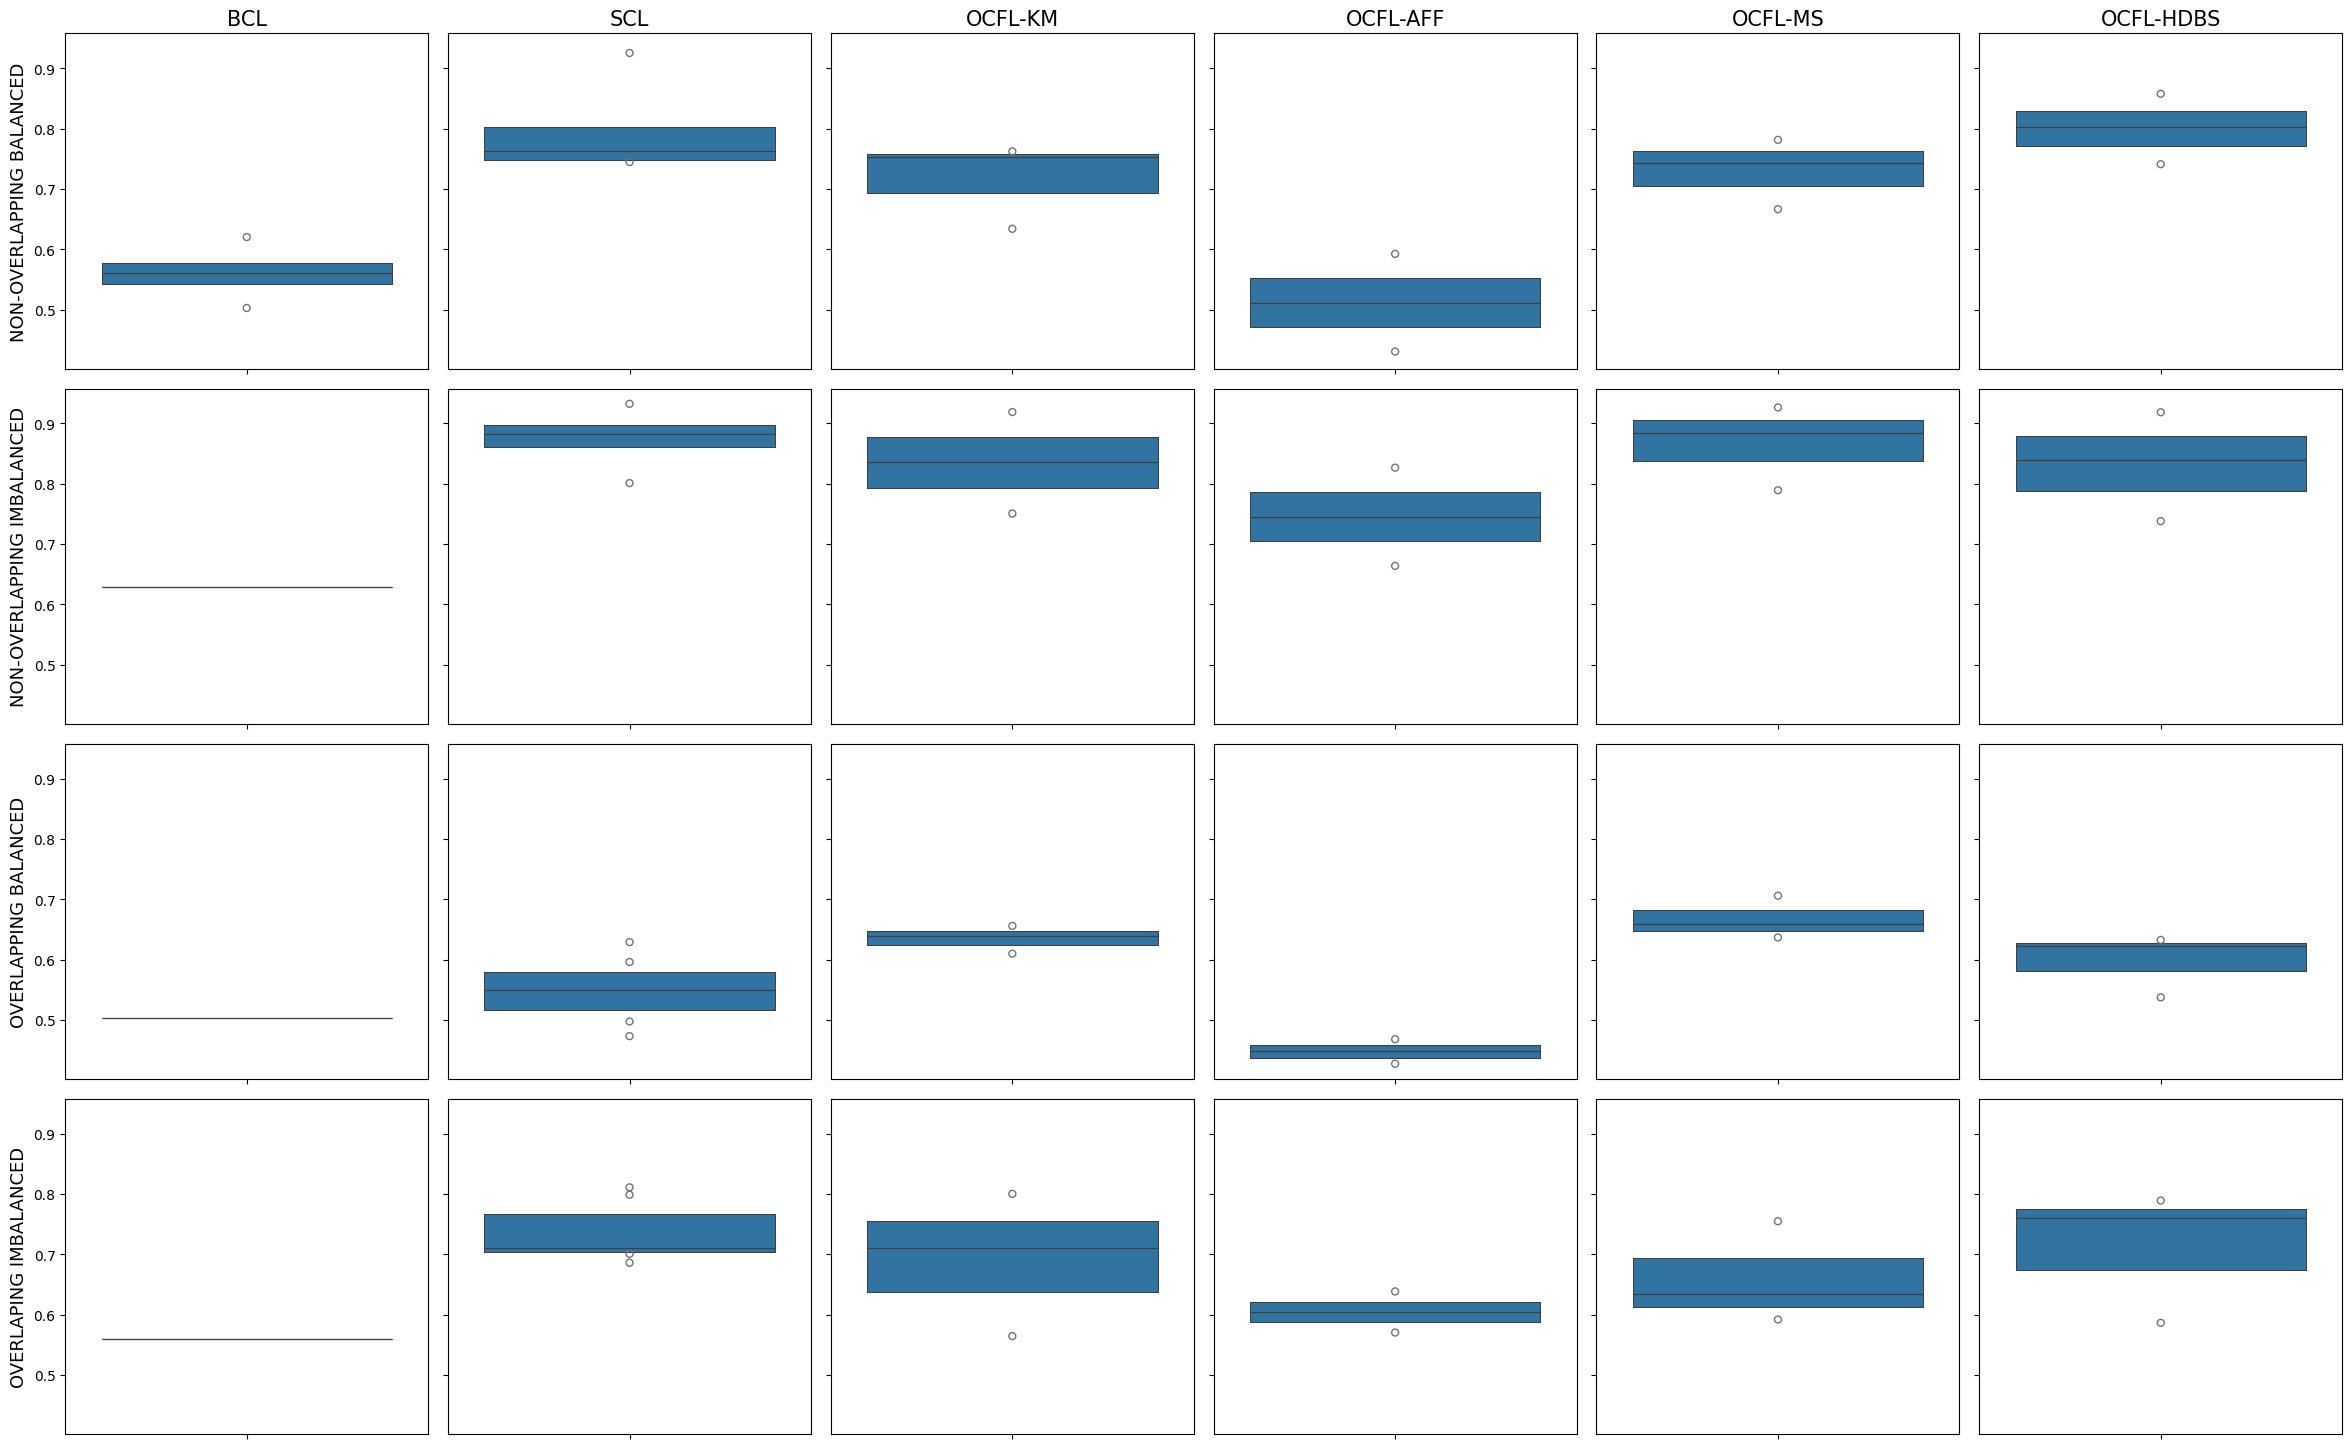

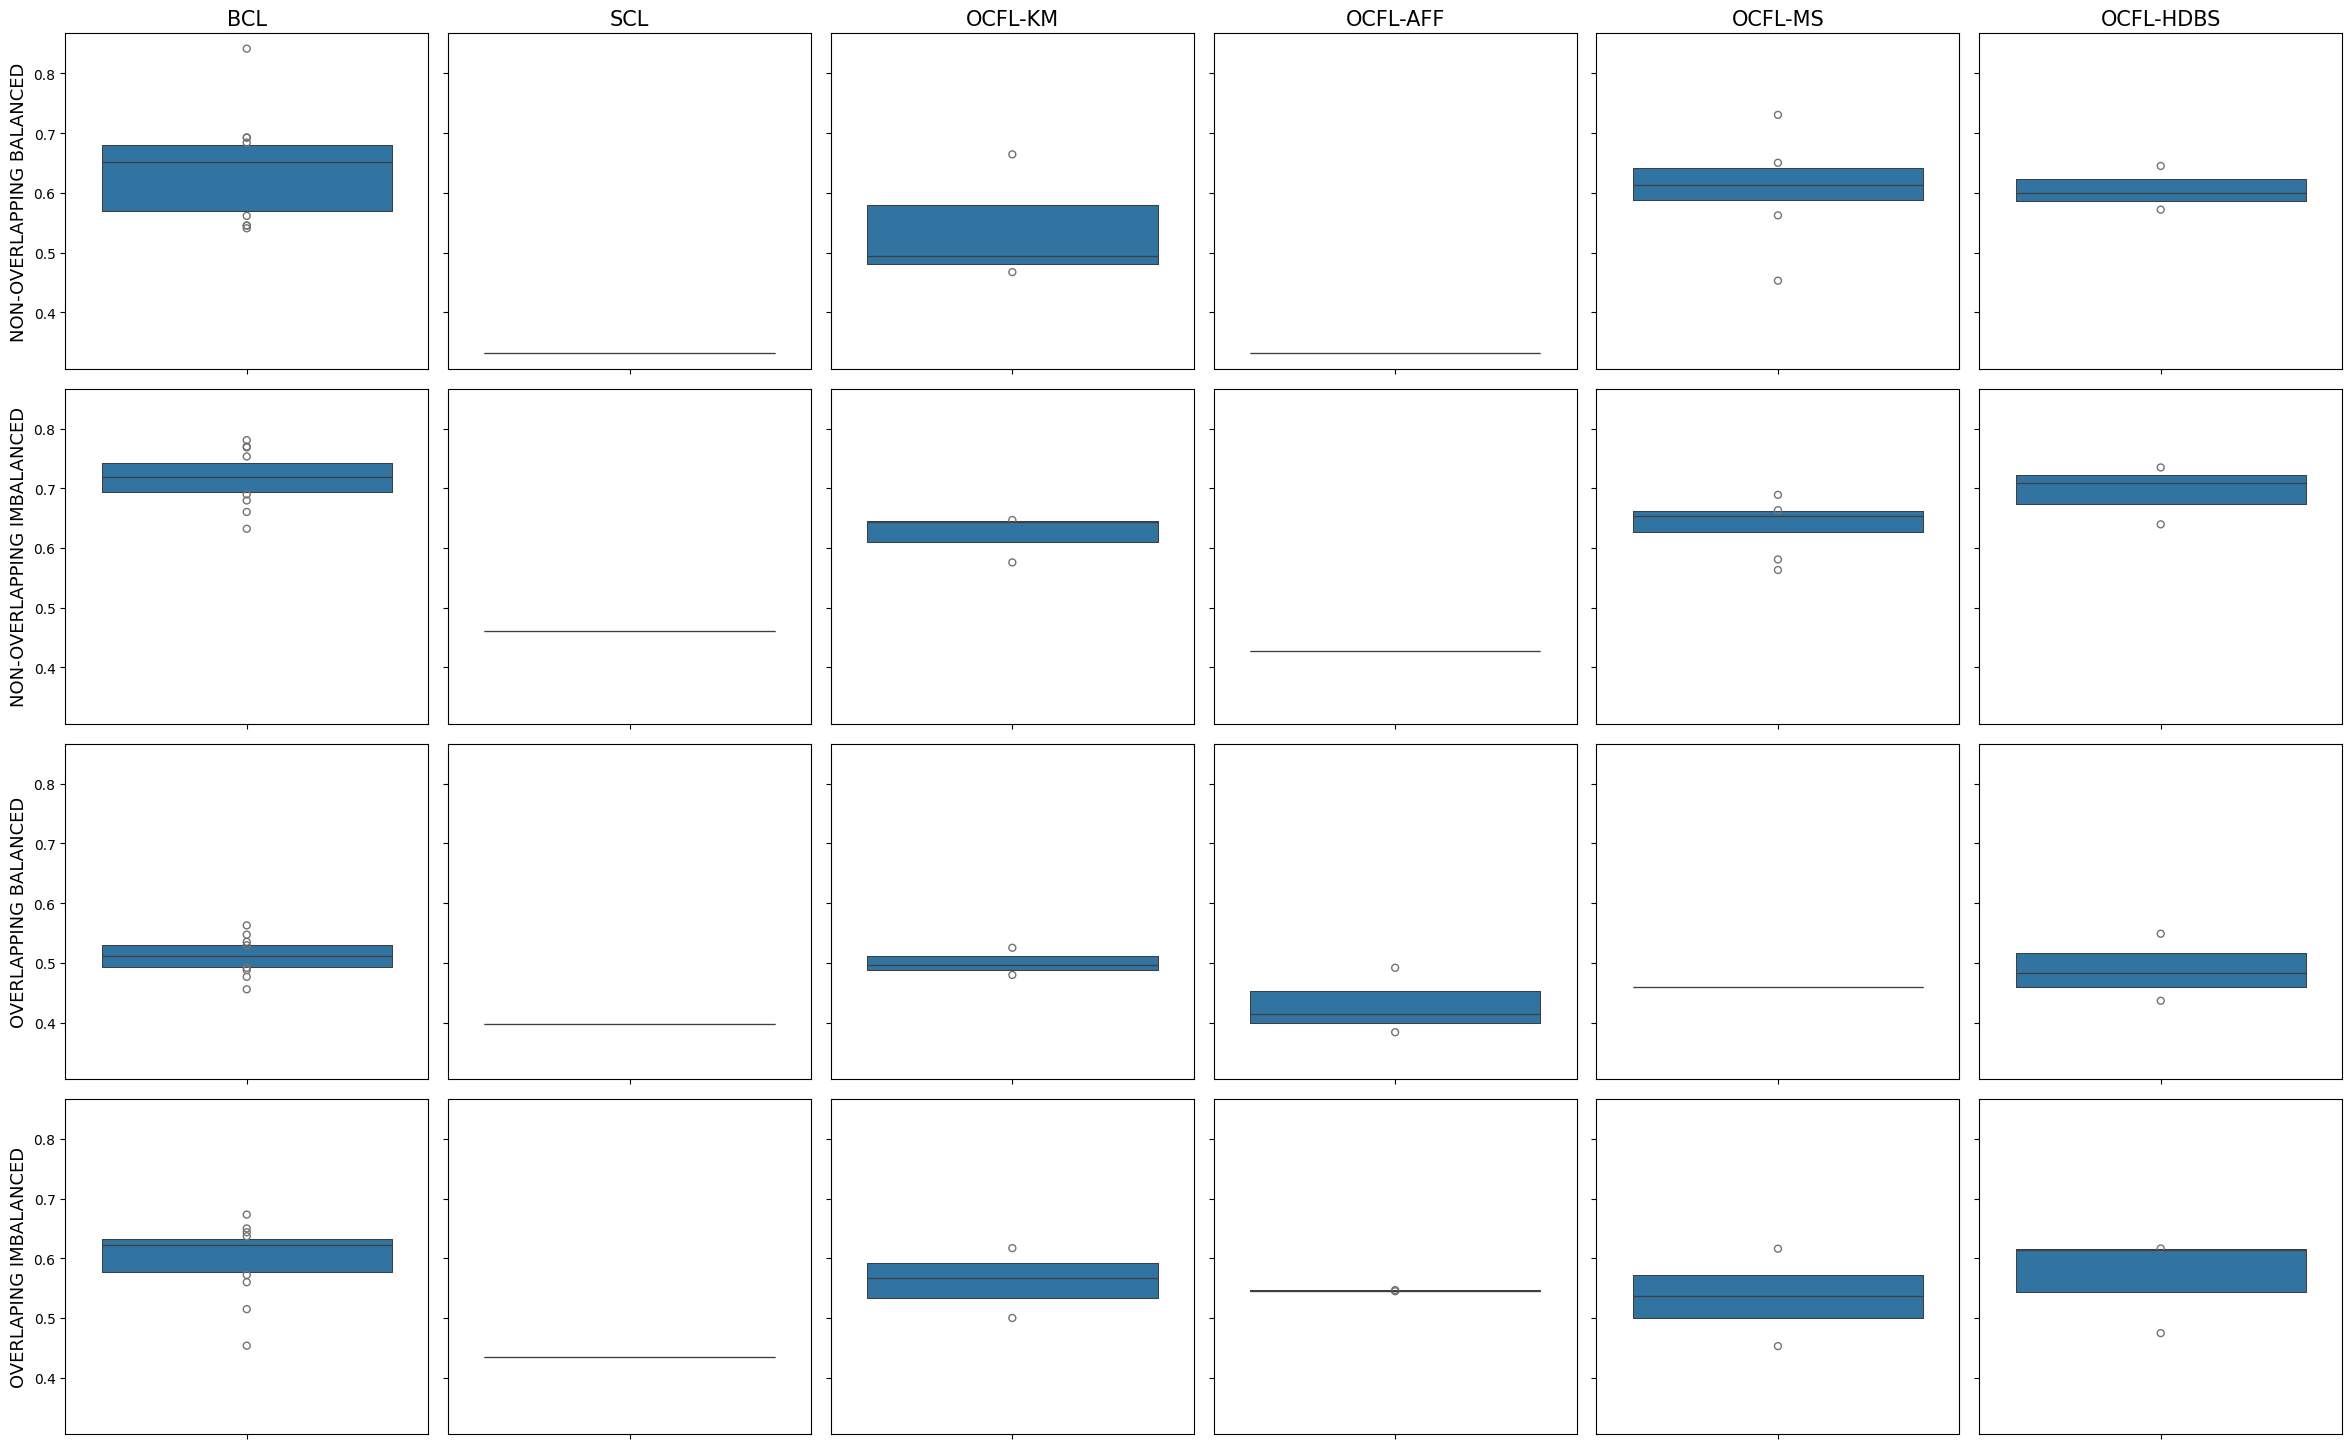

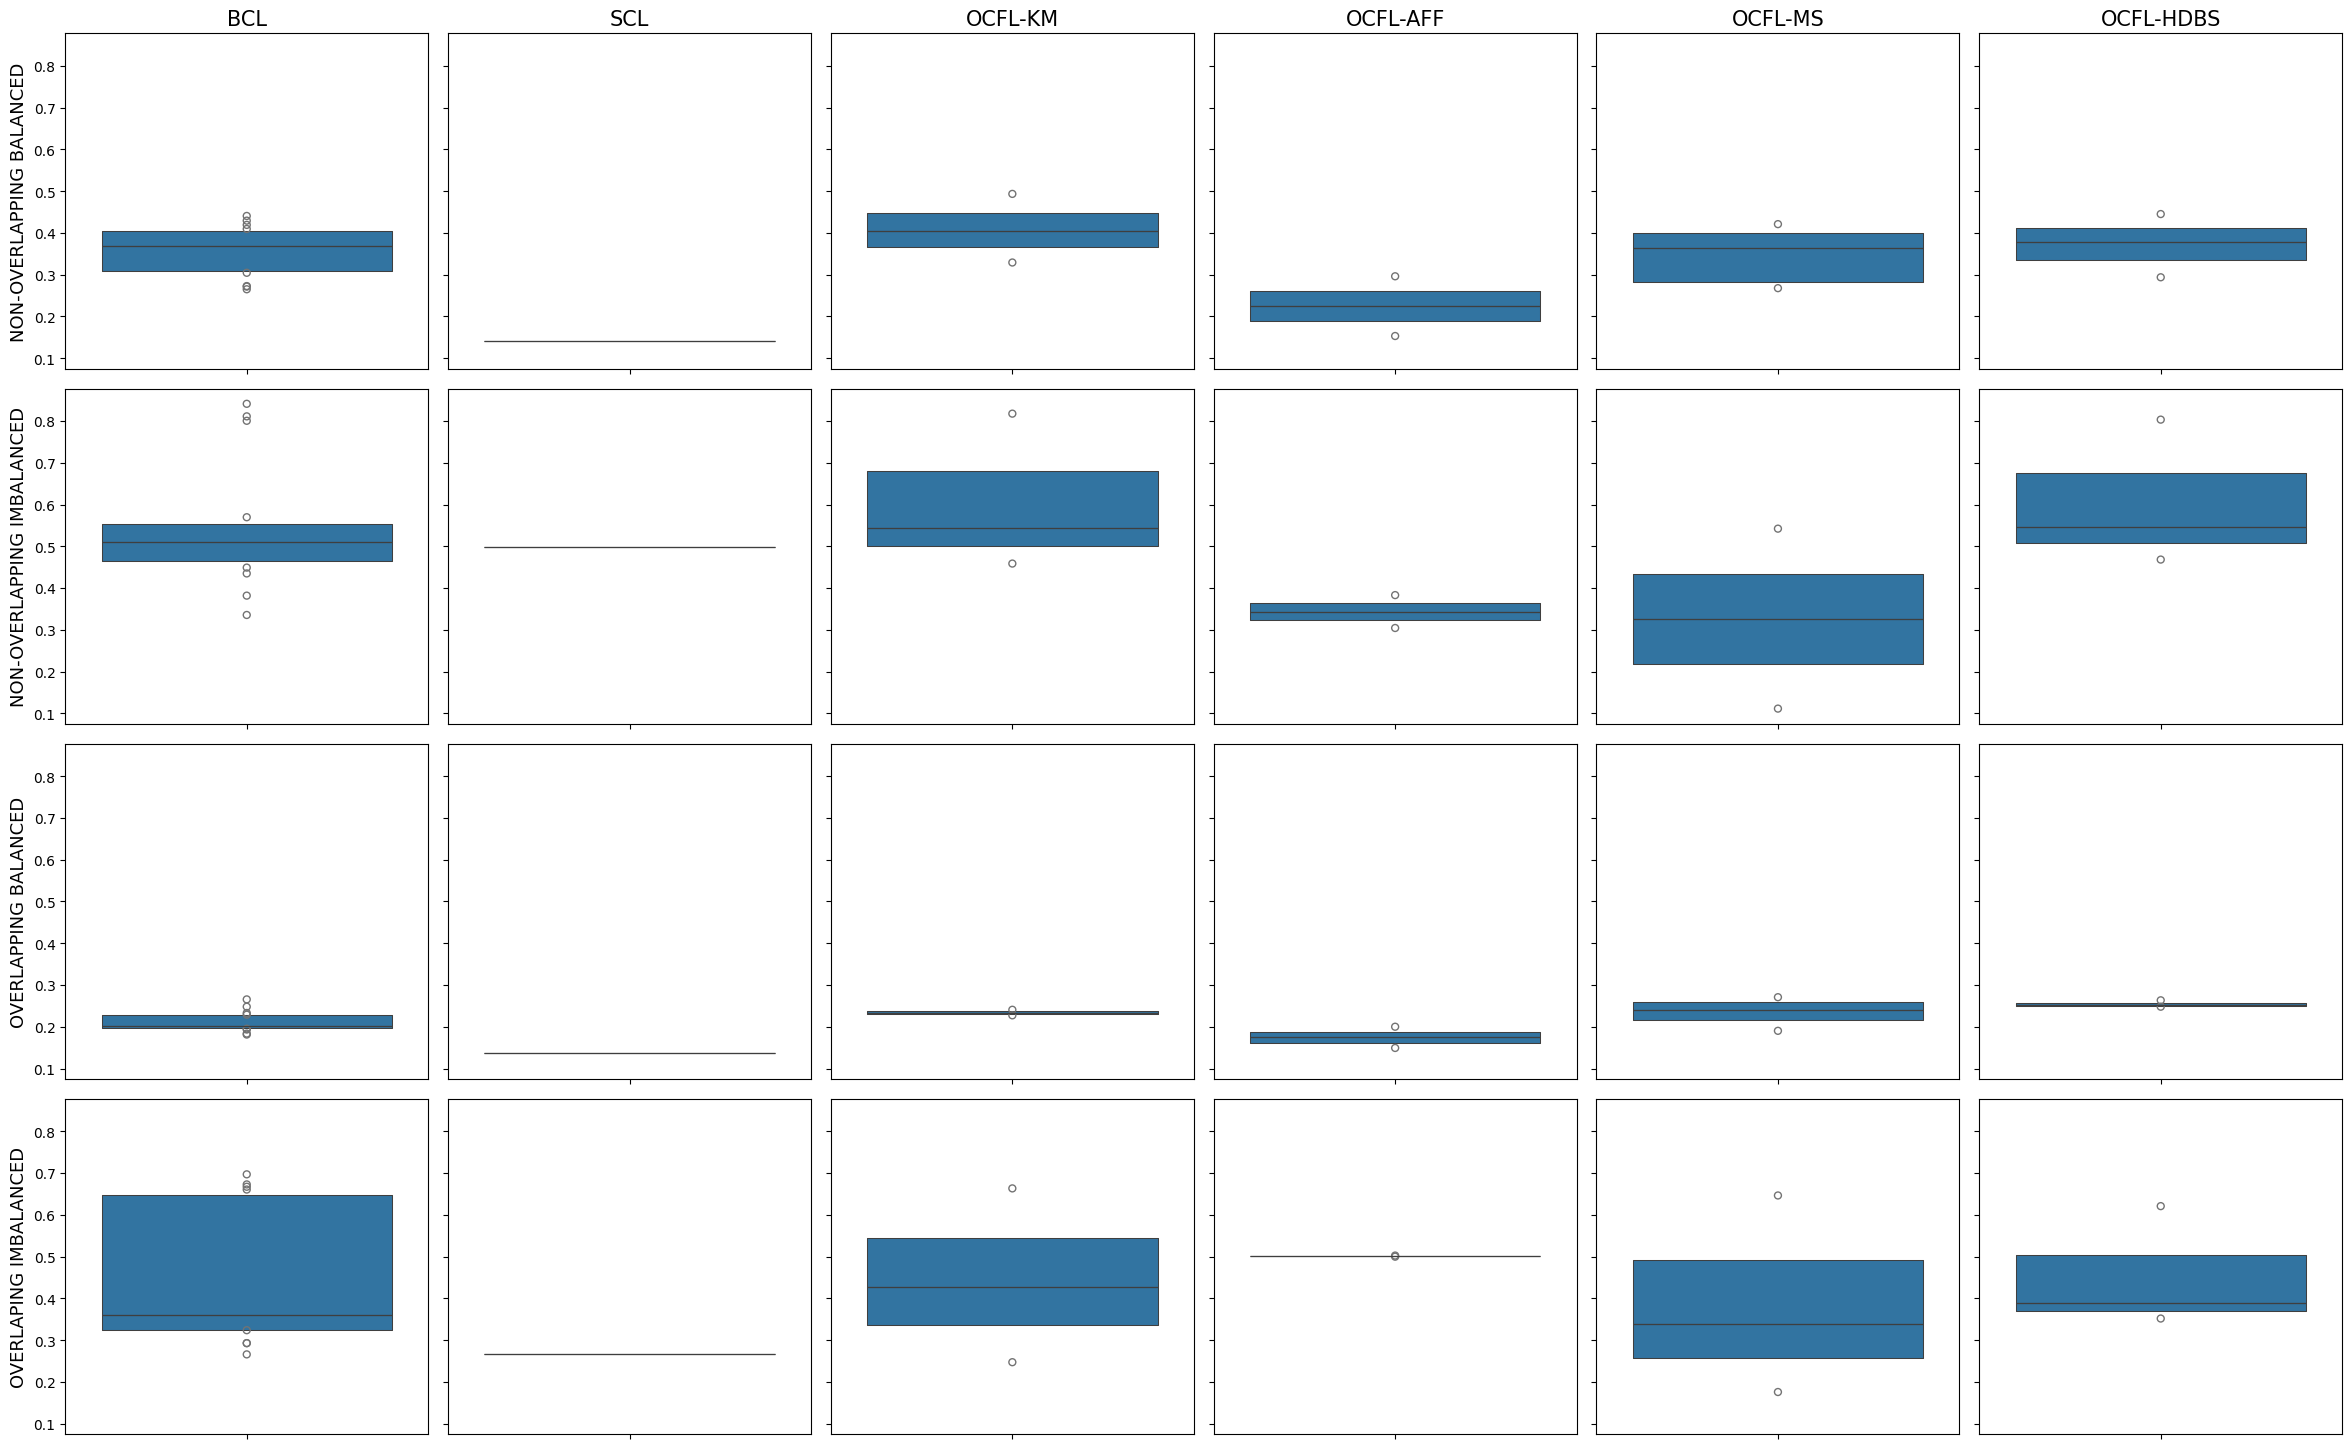

In [22]:
EXPERIMENTS = ['experiment1A']
for experiment in EXPERIMENTS:
    for dataset in DATASETS:
        fig, axes = plt.subplots(4, 6, figsize=SPECIAL_RATIO, sharex=True, sharey=True)
        for row_pos, overlap in enumerate(OVERLAPS):
            for col_pos, algo in enumerate(ALGOS):
                path = os.path.join(EXPERIMENTS_ROOT, experiment, dataset, f'{dataset}_{overlap}_15_{algo}.csv')
                frame = pd.read_csv(path)
                sns.boxenplot(frame['ins_mean'], ax=axes[row_pos, col_pos])
                if row_pos == 0:
                    axes[row_pos, col_pos].set_title(ALGO_NAME_MAPPING[algo], fontsize=TITLE_FONT)
                if col_pos == 0:
                    axes[row_pos, col_pos].set_ylabel(SPLIT_NAME_MAPPING[overlap], fontsize=Y_LABEL_FONT)
        fig.tight_layout()
        fig.savefig(os.path.join(EXPERIMENTS_ROOT, experiment, dataset, 'XAI_histogram.png'))

## Experiment B (Out-of-Distribution)

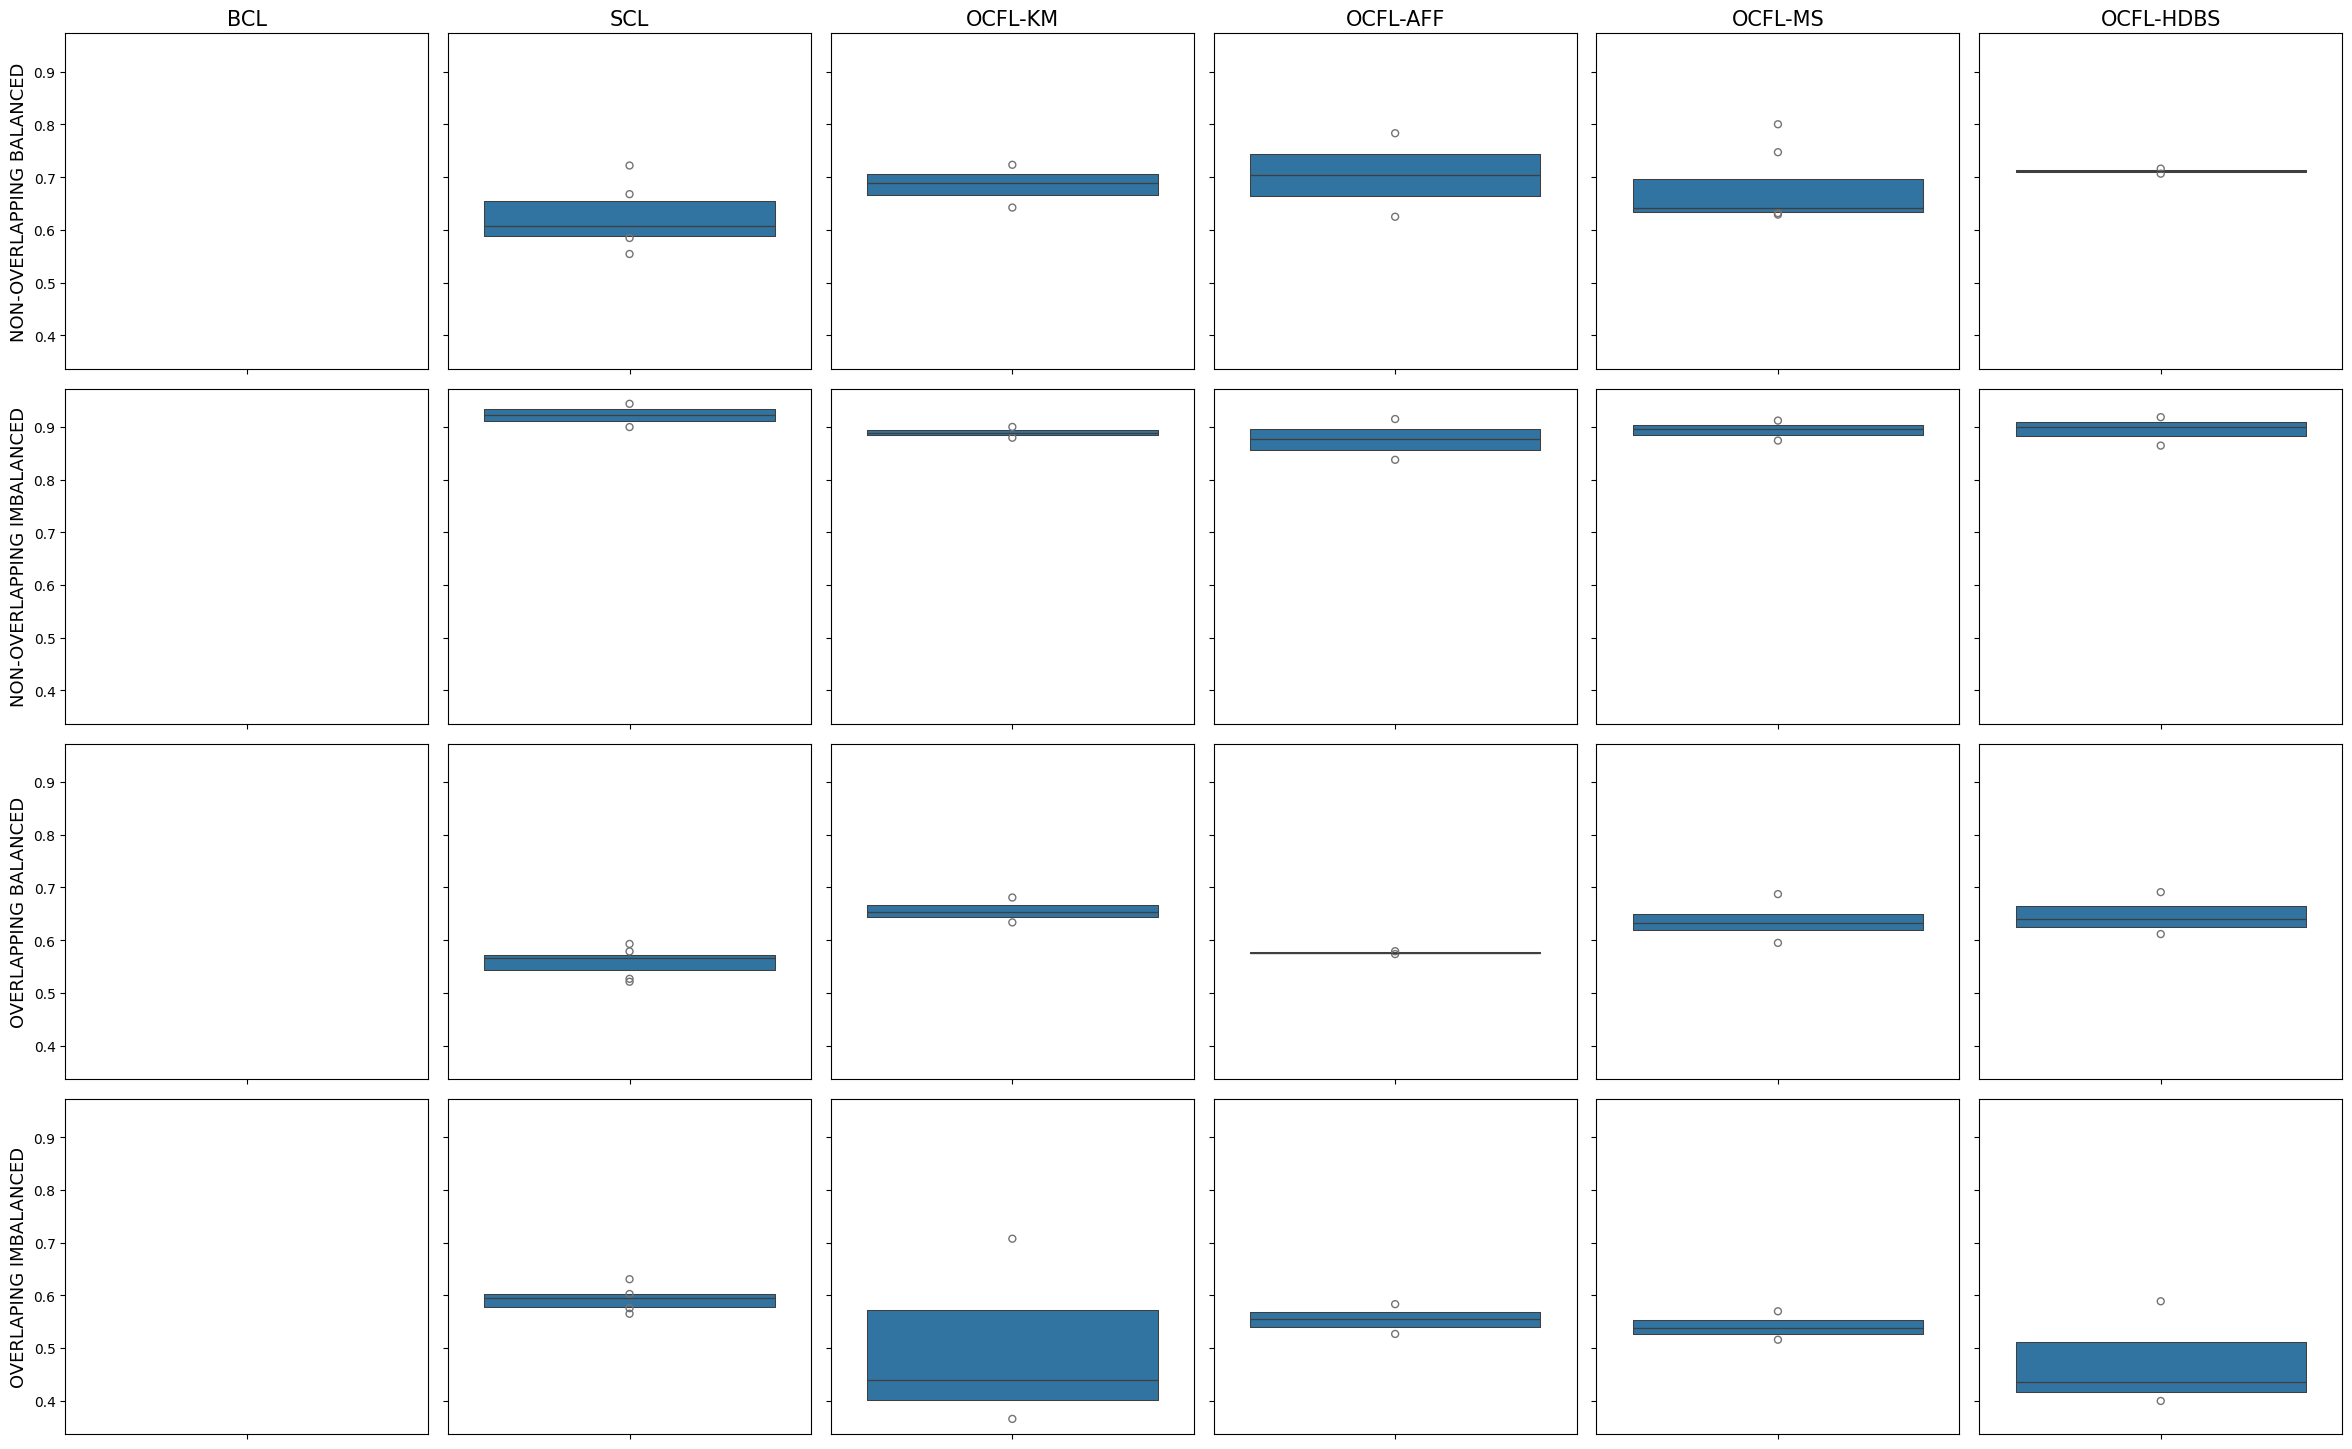

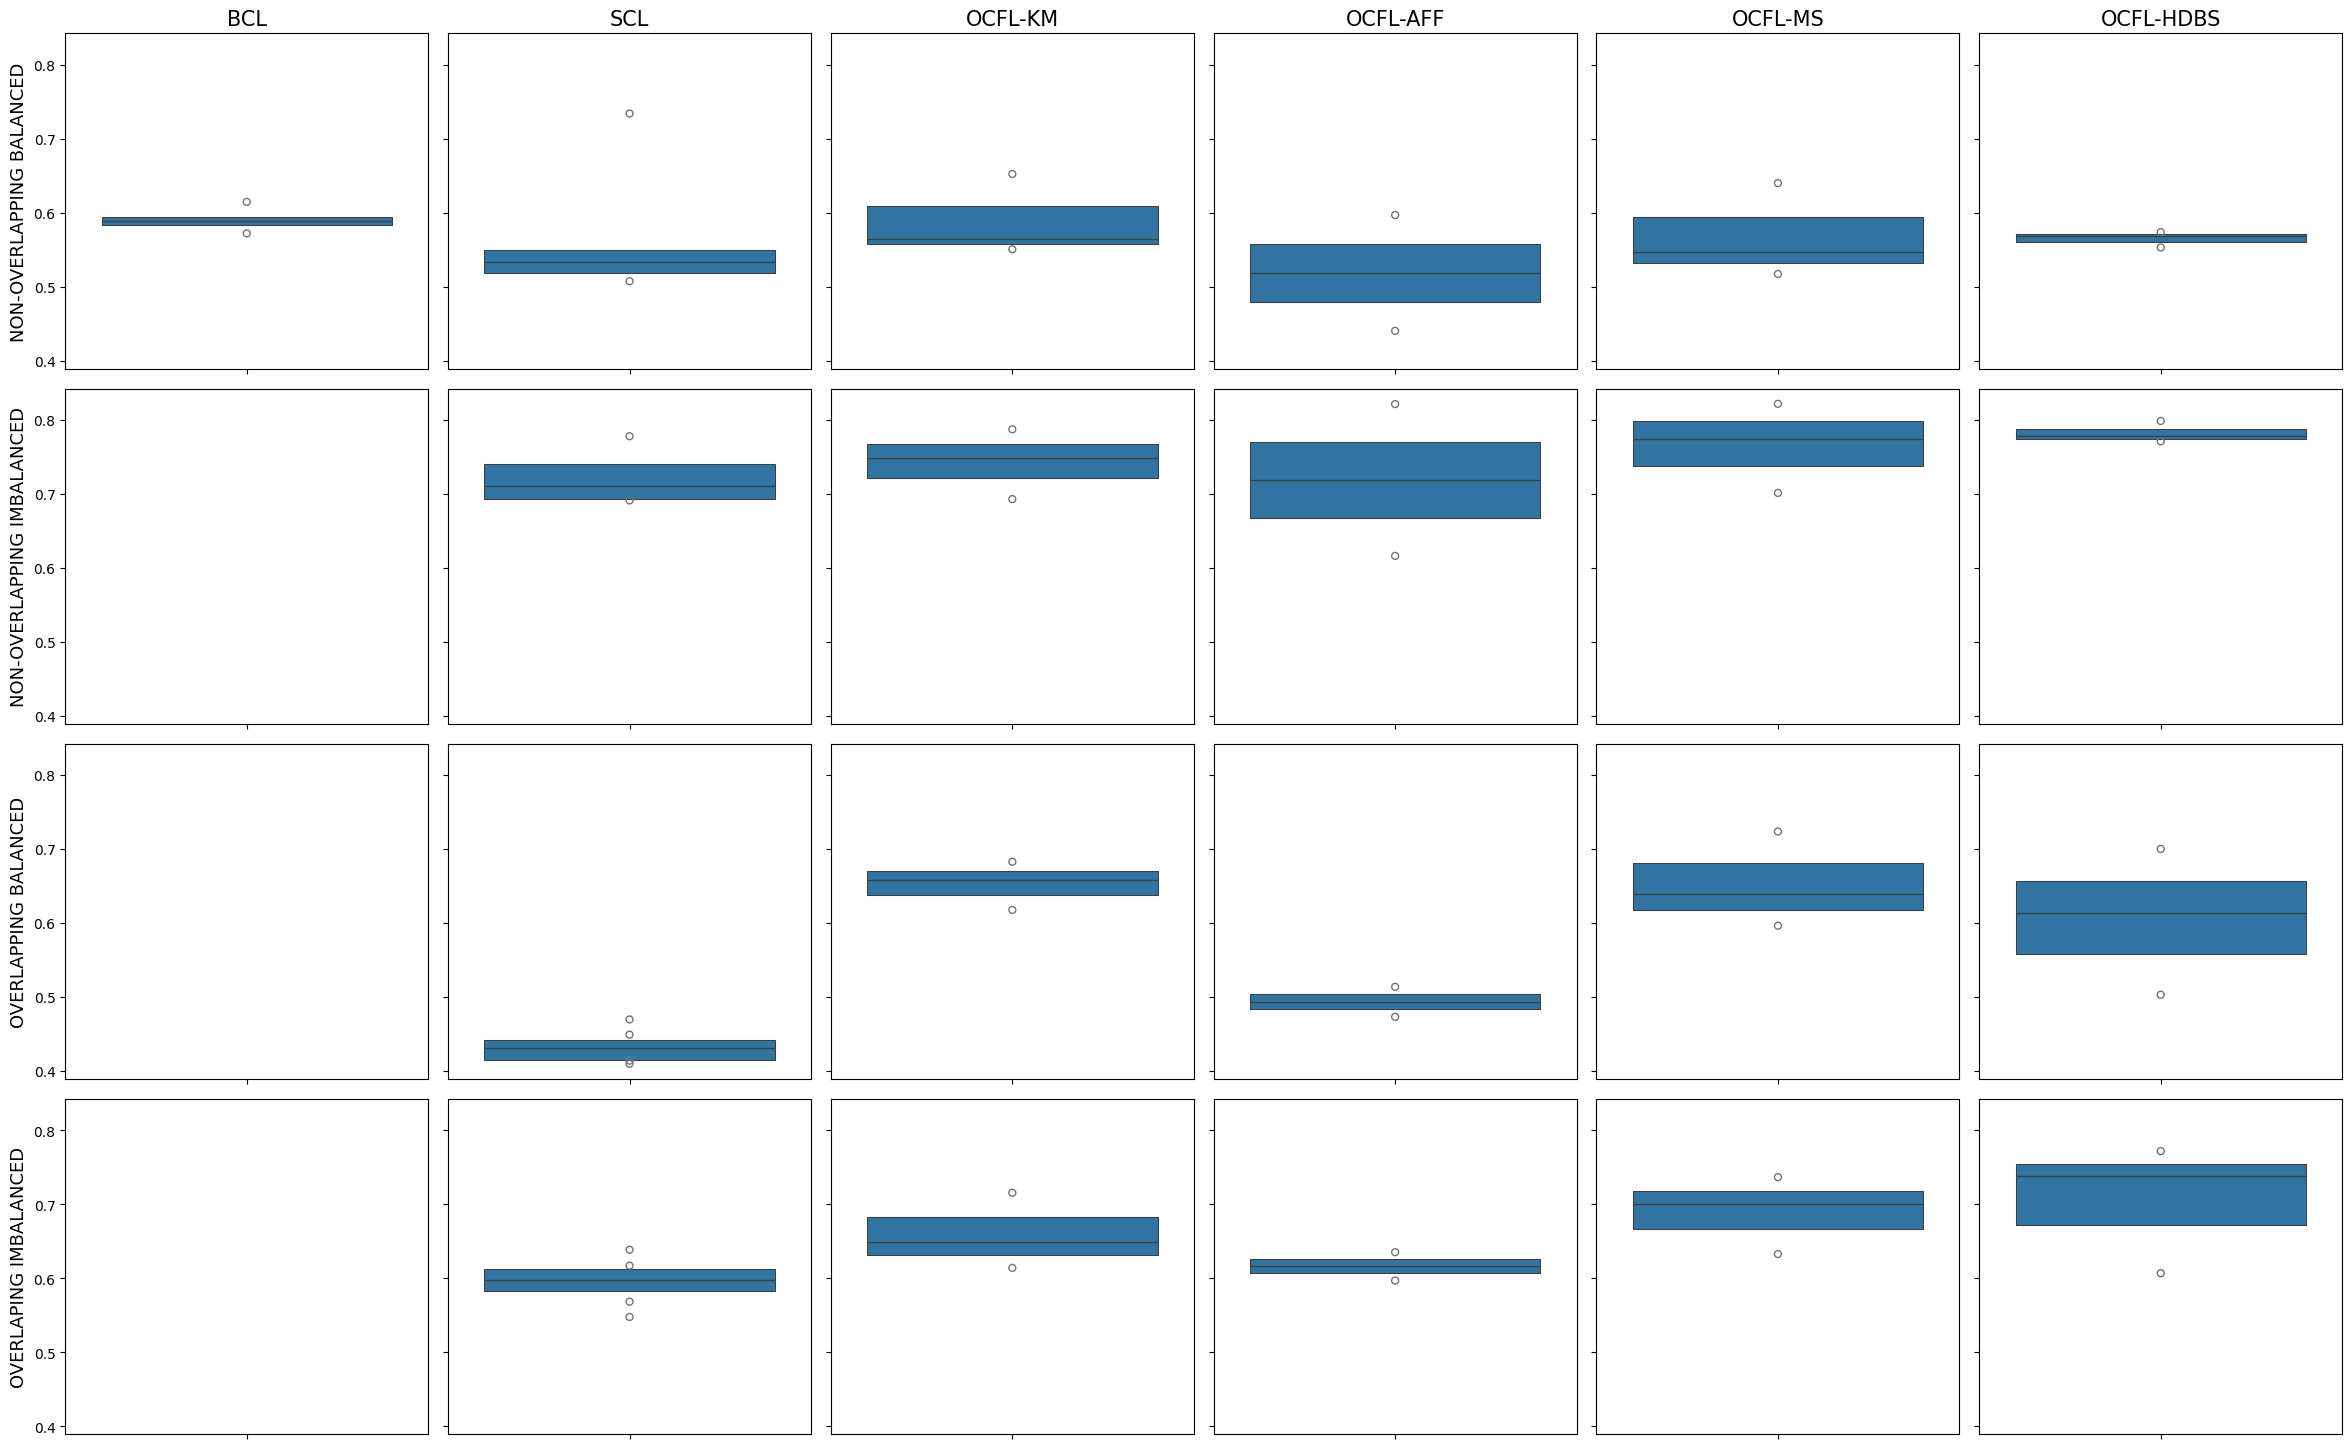

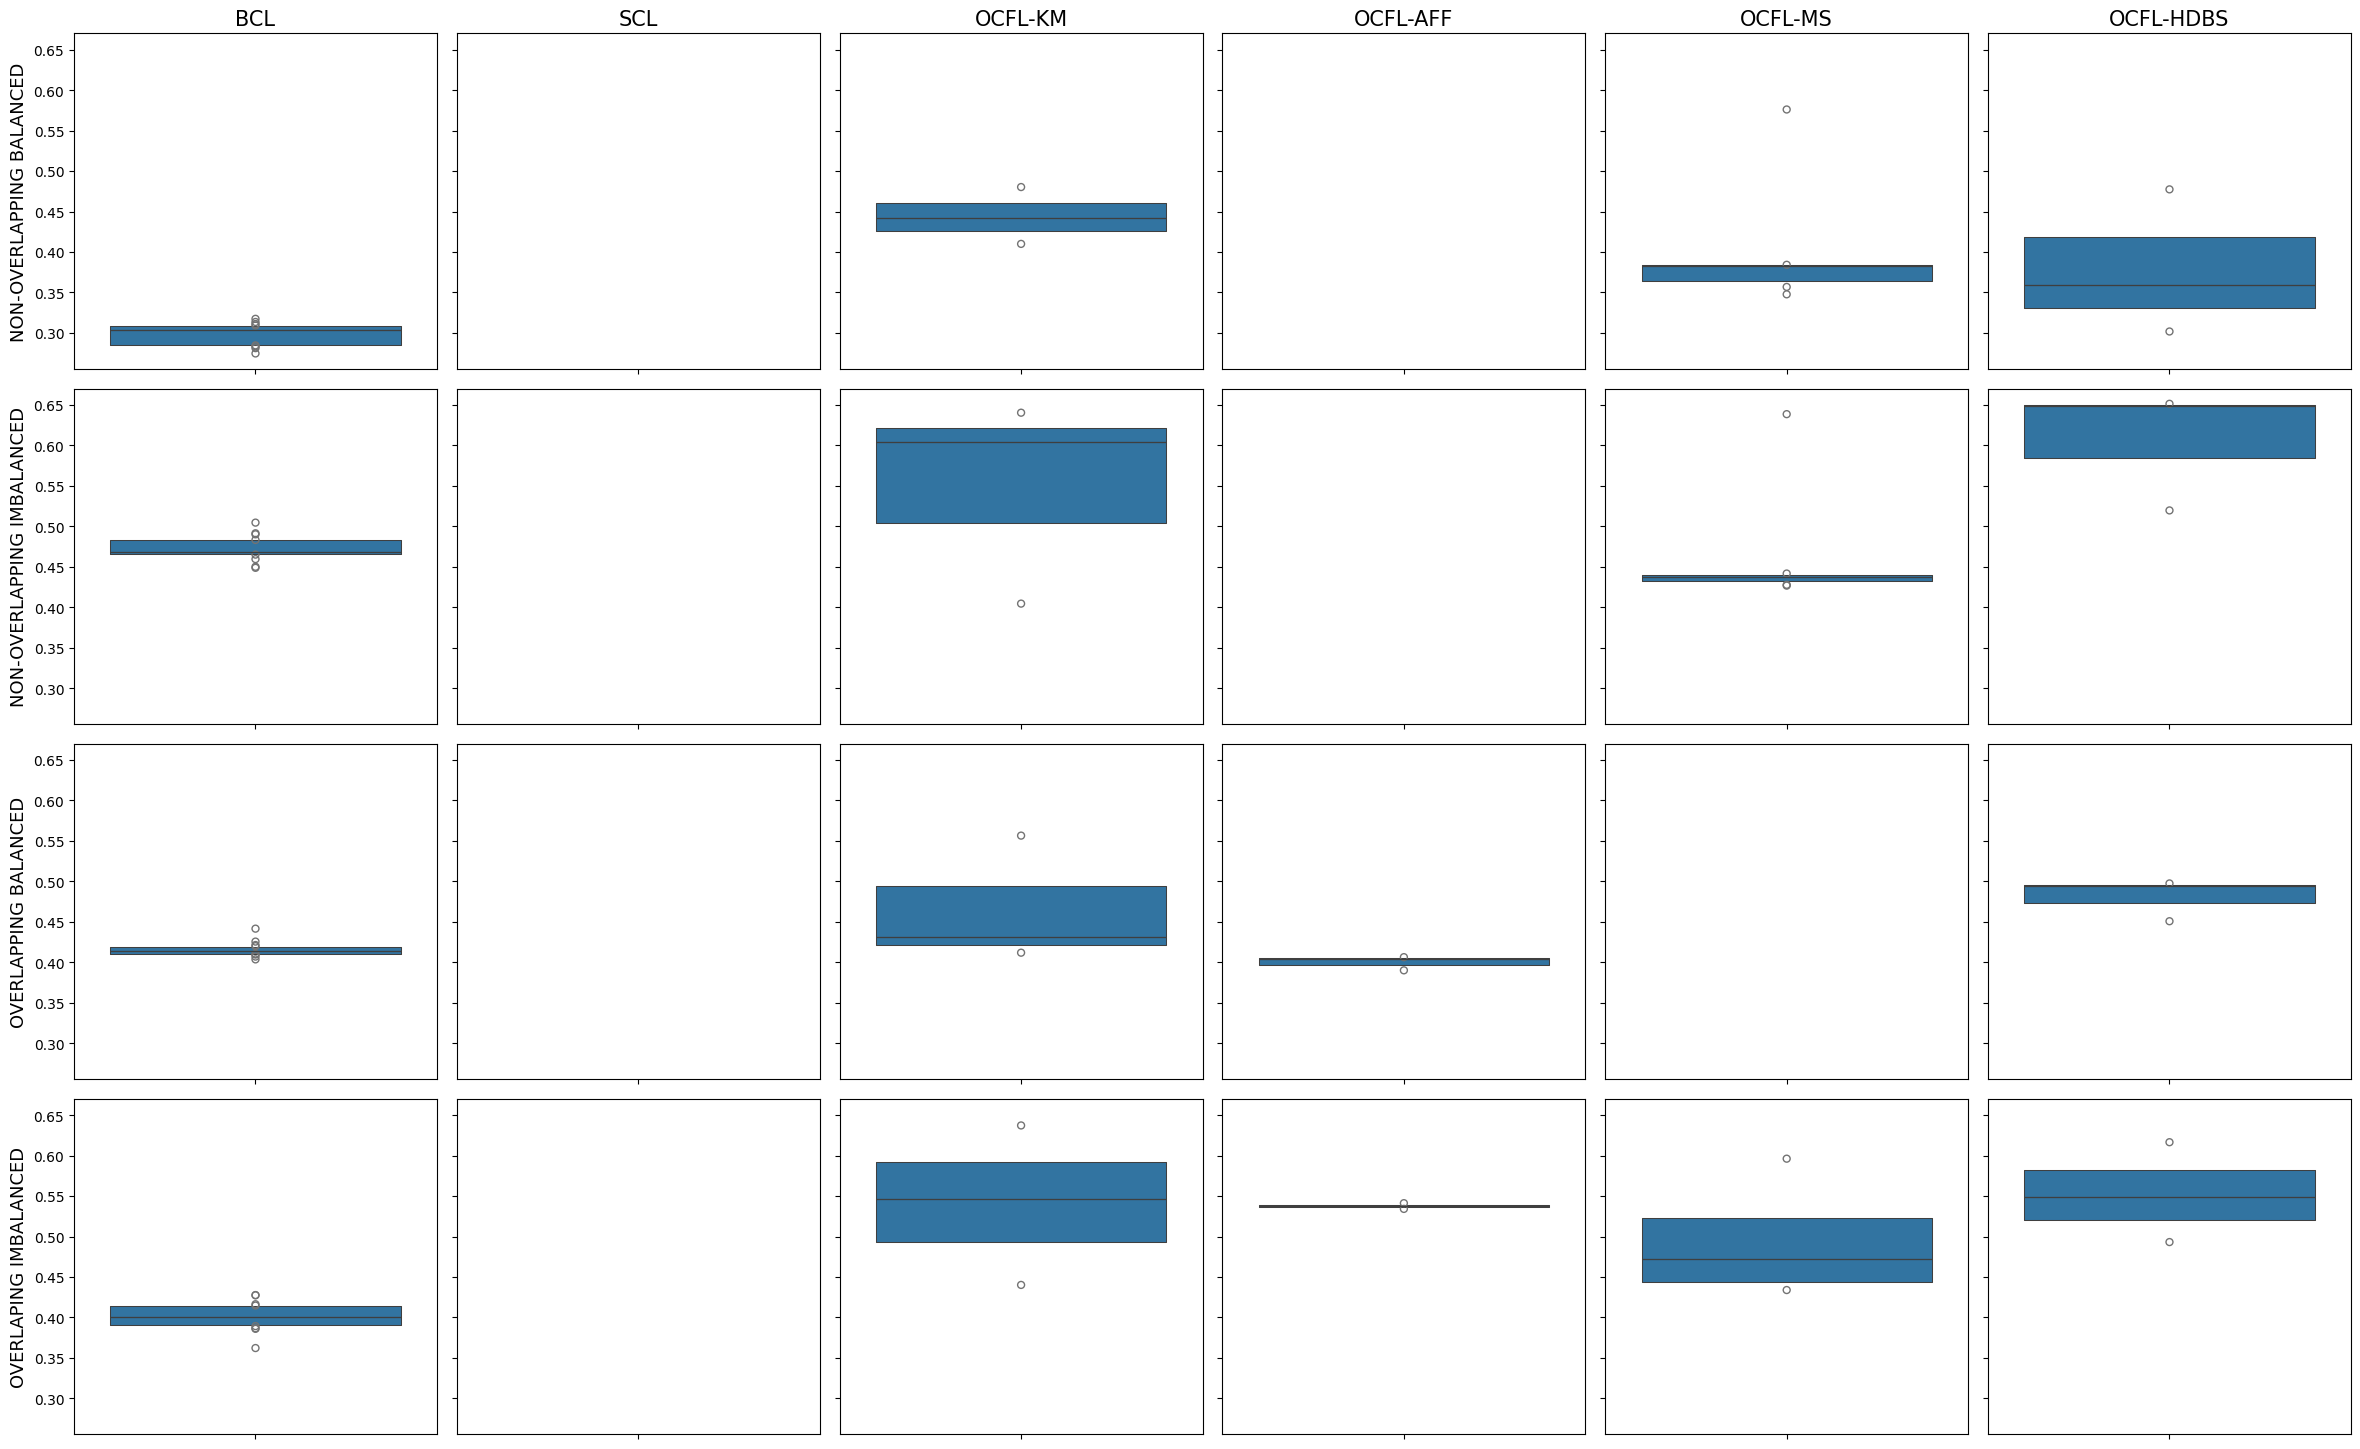

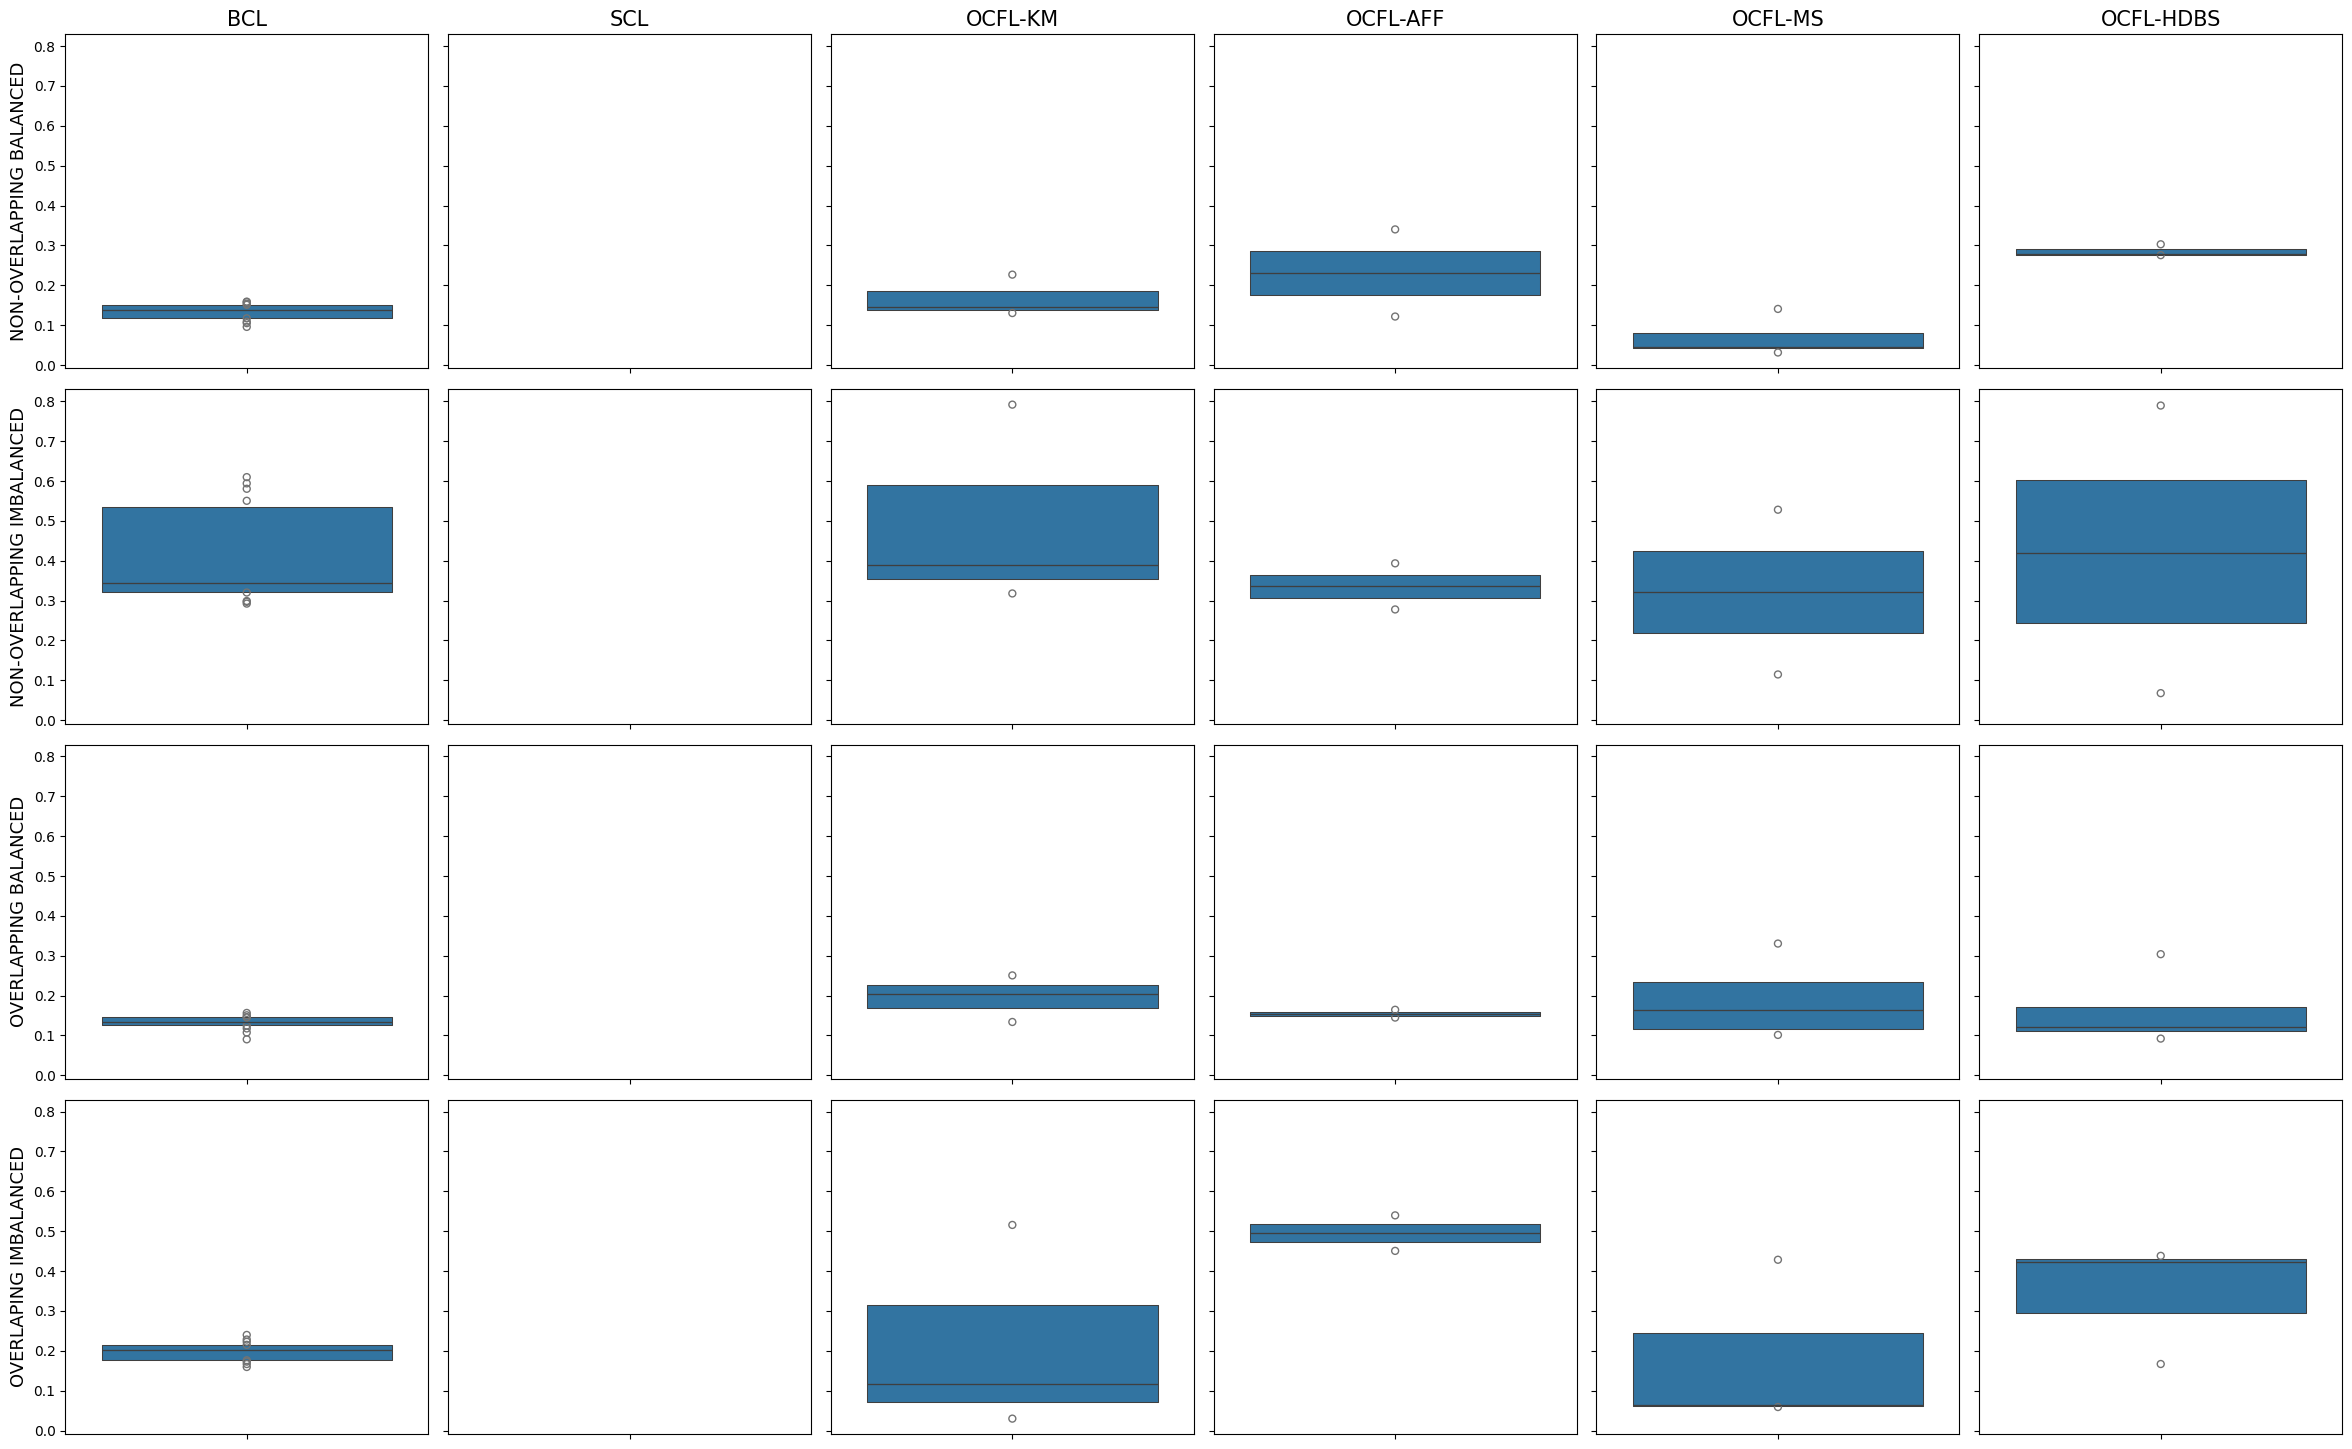

In [25]:
EXPERIMENTS = ['experiment1B']
for experiment in EXPERIMENTS:
    for dataset in DATASETS:
        fig, axes = plt.subplots(4, 6, figsize=SPECIAL_RATIO, sharex=True, sharey=True)
        for row_pos, overlap in enumerate(OVERLAPS):
            for col_pos, algo in enumerate(ALGOS):
                path = os.path.join(EXPERIMENTS_ROOT, experiment, dataset, f'{dataset}_{overlap}_15_{algo}.csv')
                frame = pd.read_csv(path)
                sns.boxenplot(frame['ins_mean'], ax=axes[row_pos, col_pos])
                if row_pos == 0:
                    axes[row_pos, col_pos].set_title(ALGO_NAME_MAPPING[algo], fontsize=TITLE_FONT)
                if col_pos == 0:
                    axes[row_pos, col_pos].set_ylabel(SPLIT_NAME_MAPPING[overlap], fontsize=Y_LABEL_FONT)
        fig.tight_layout()
        fig.savefig(os.path.join(EXPERIMENTS_ROOT, experiment, dataset, 'XAI_histogram.png'))

## Experiment C (Orchestrator Test Set)

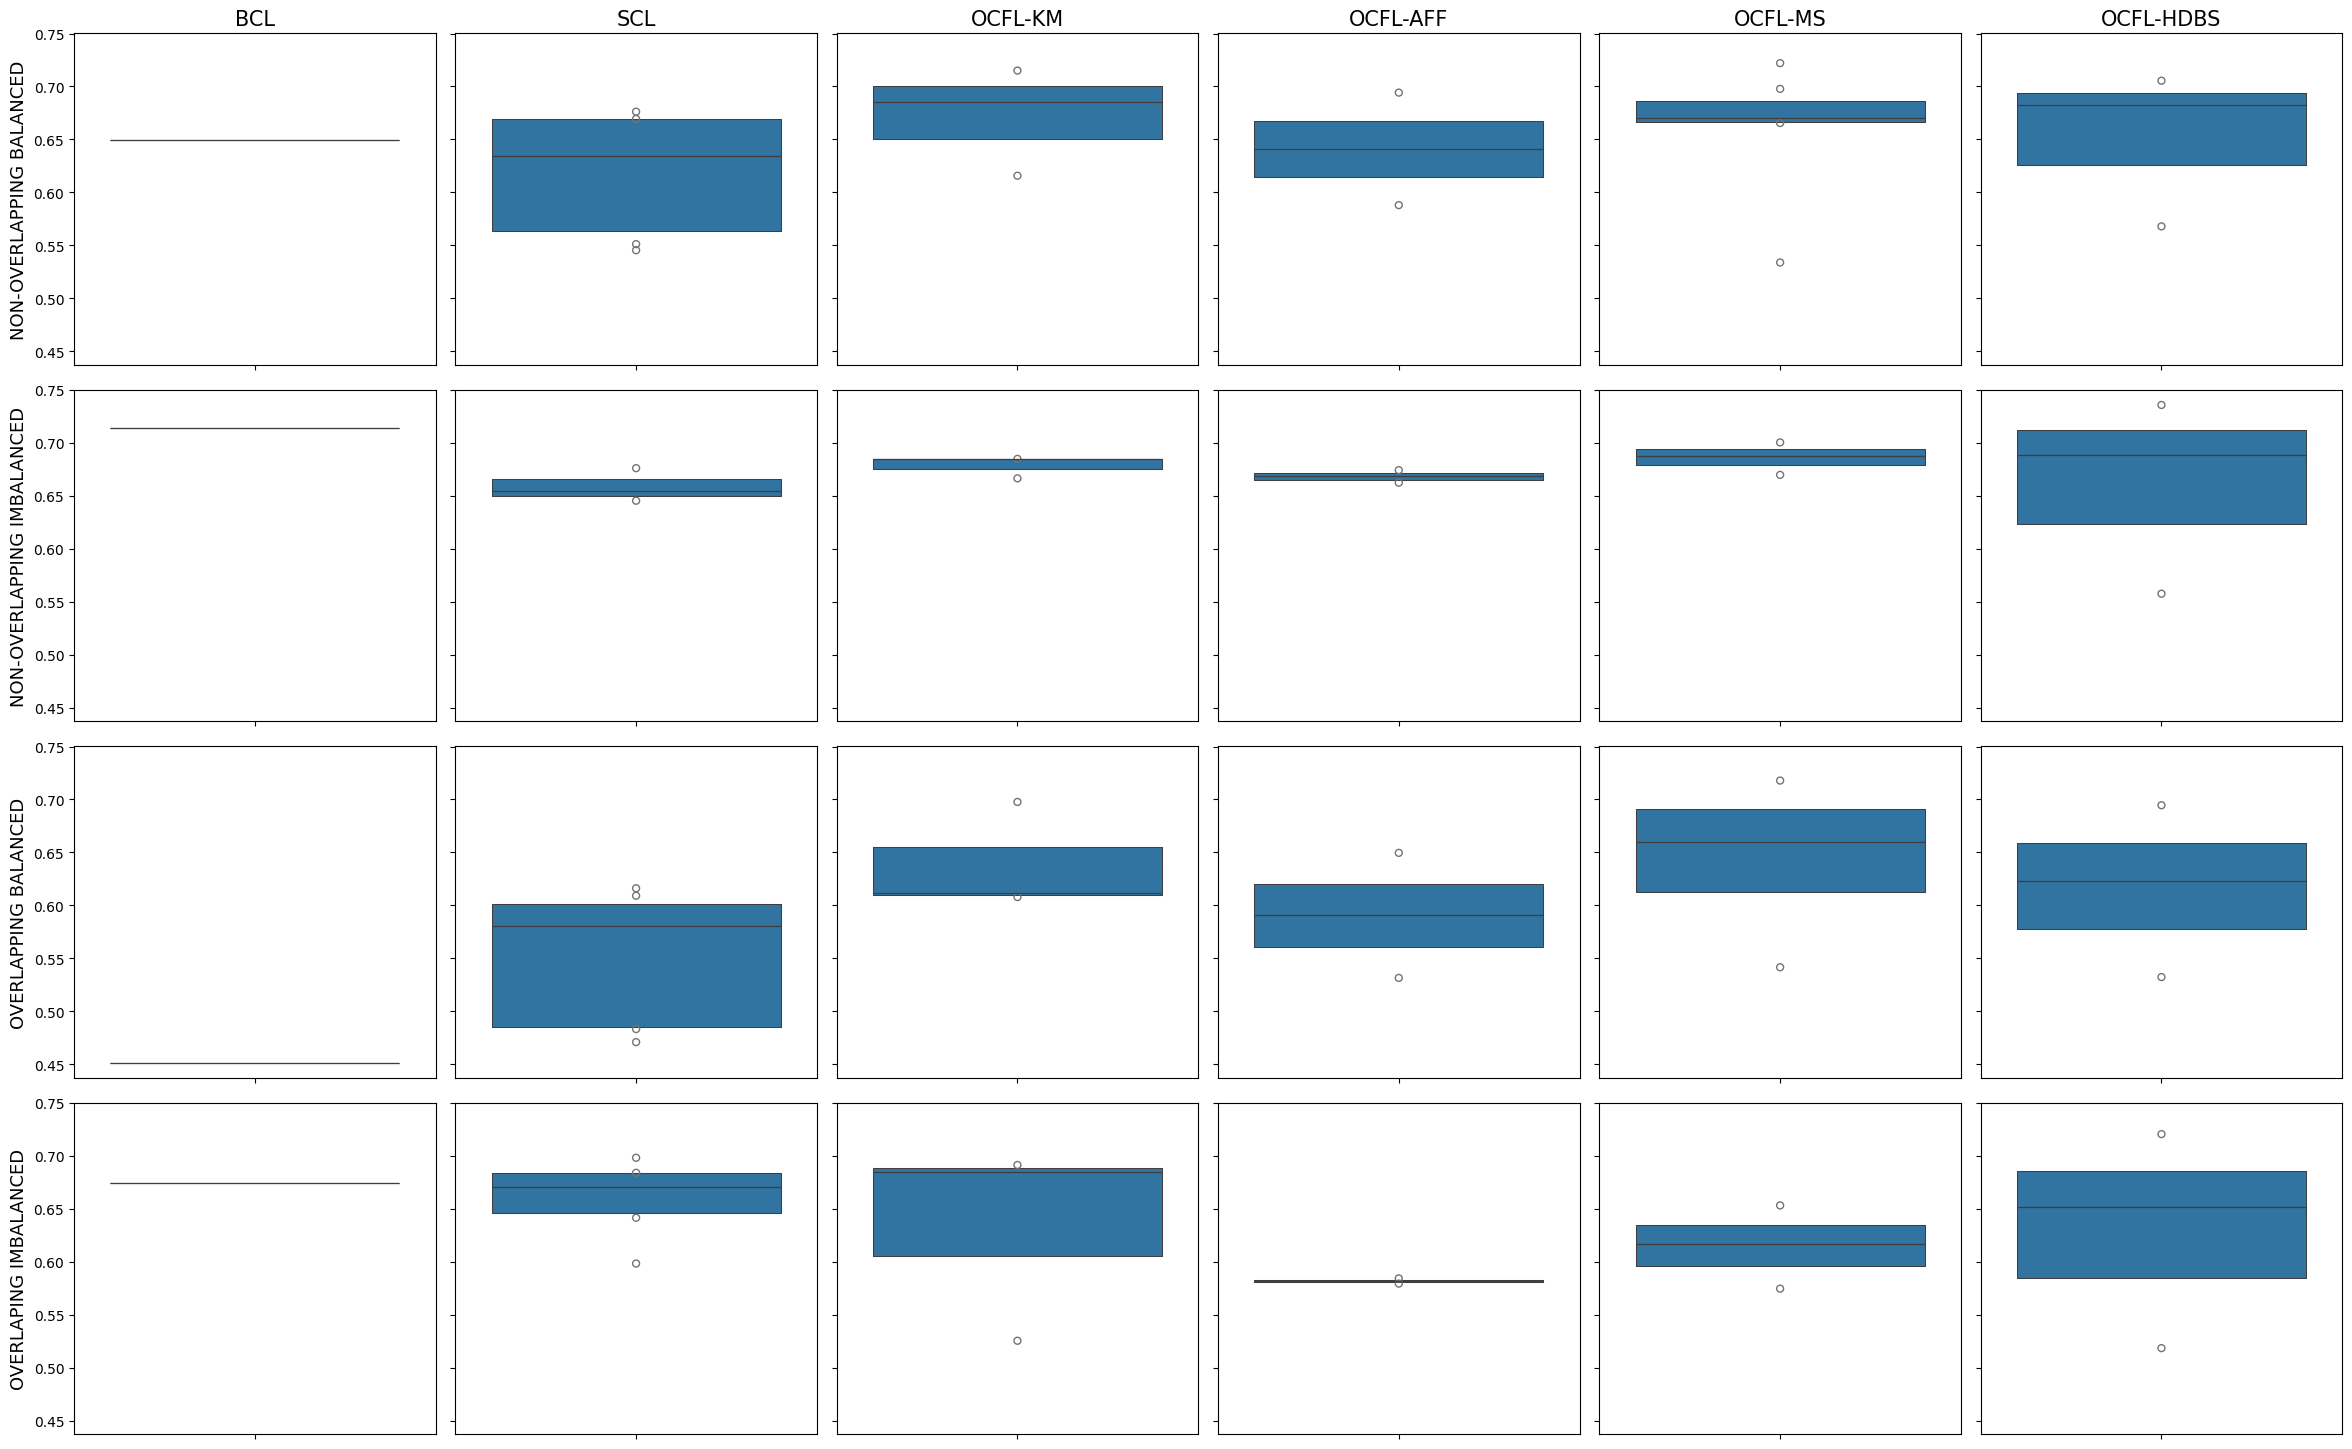

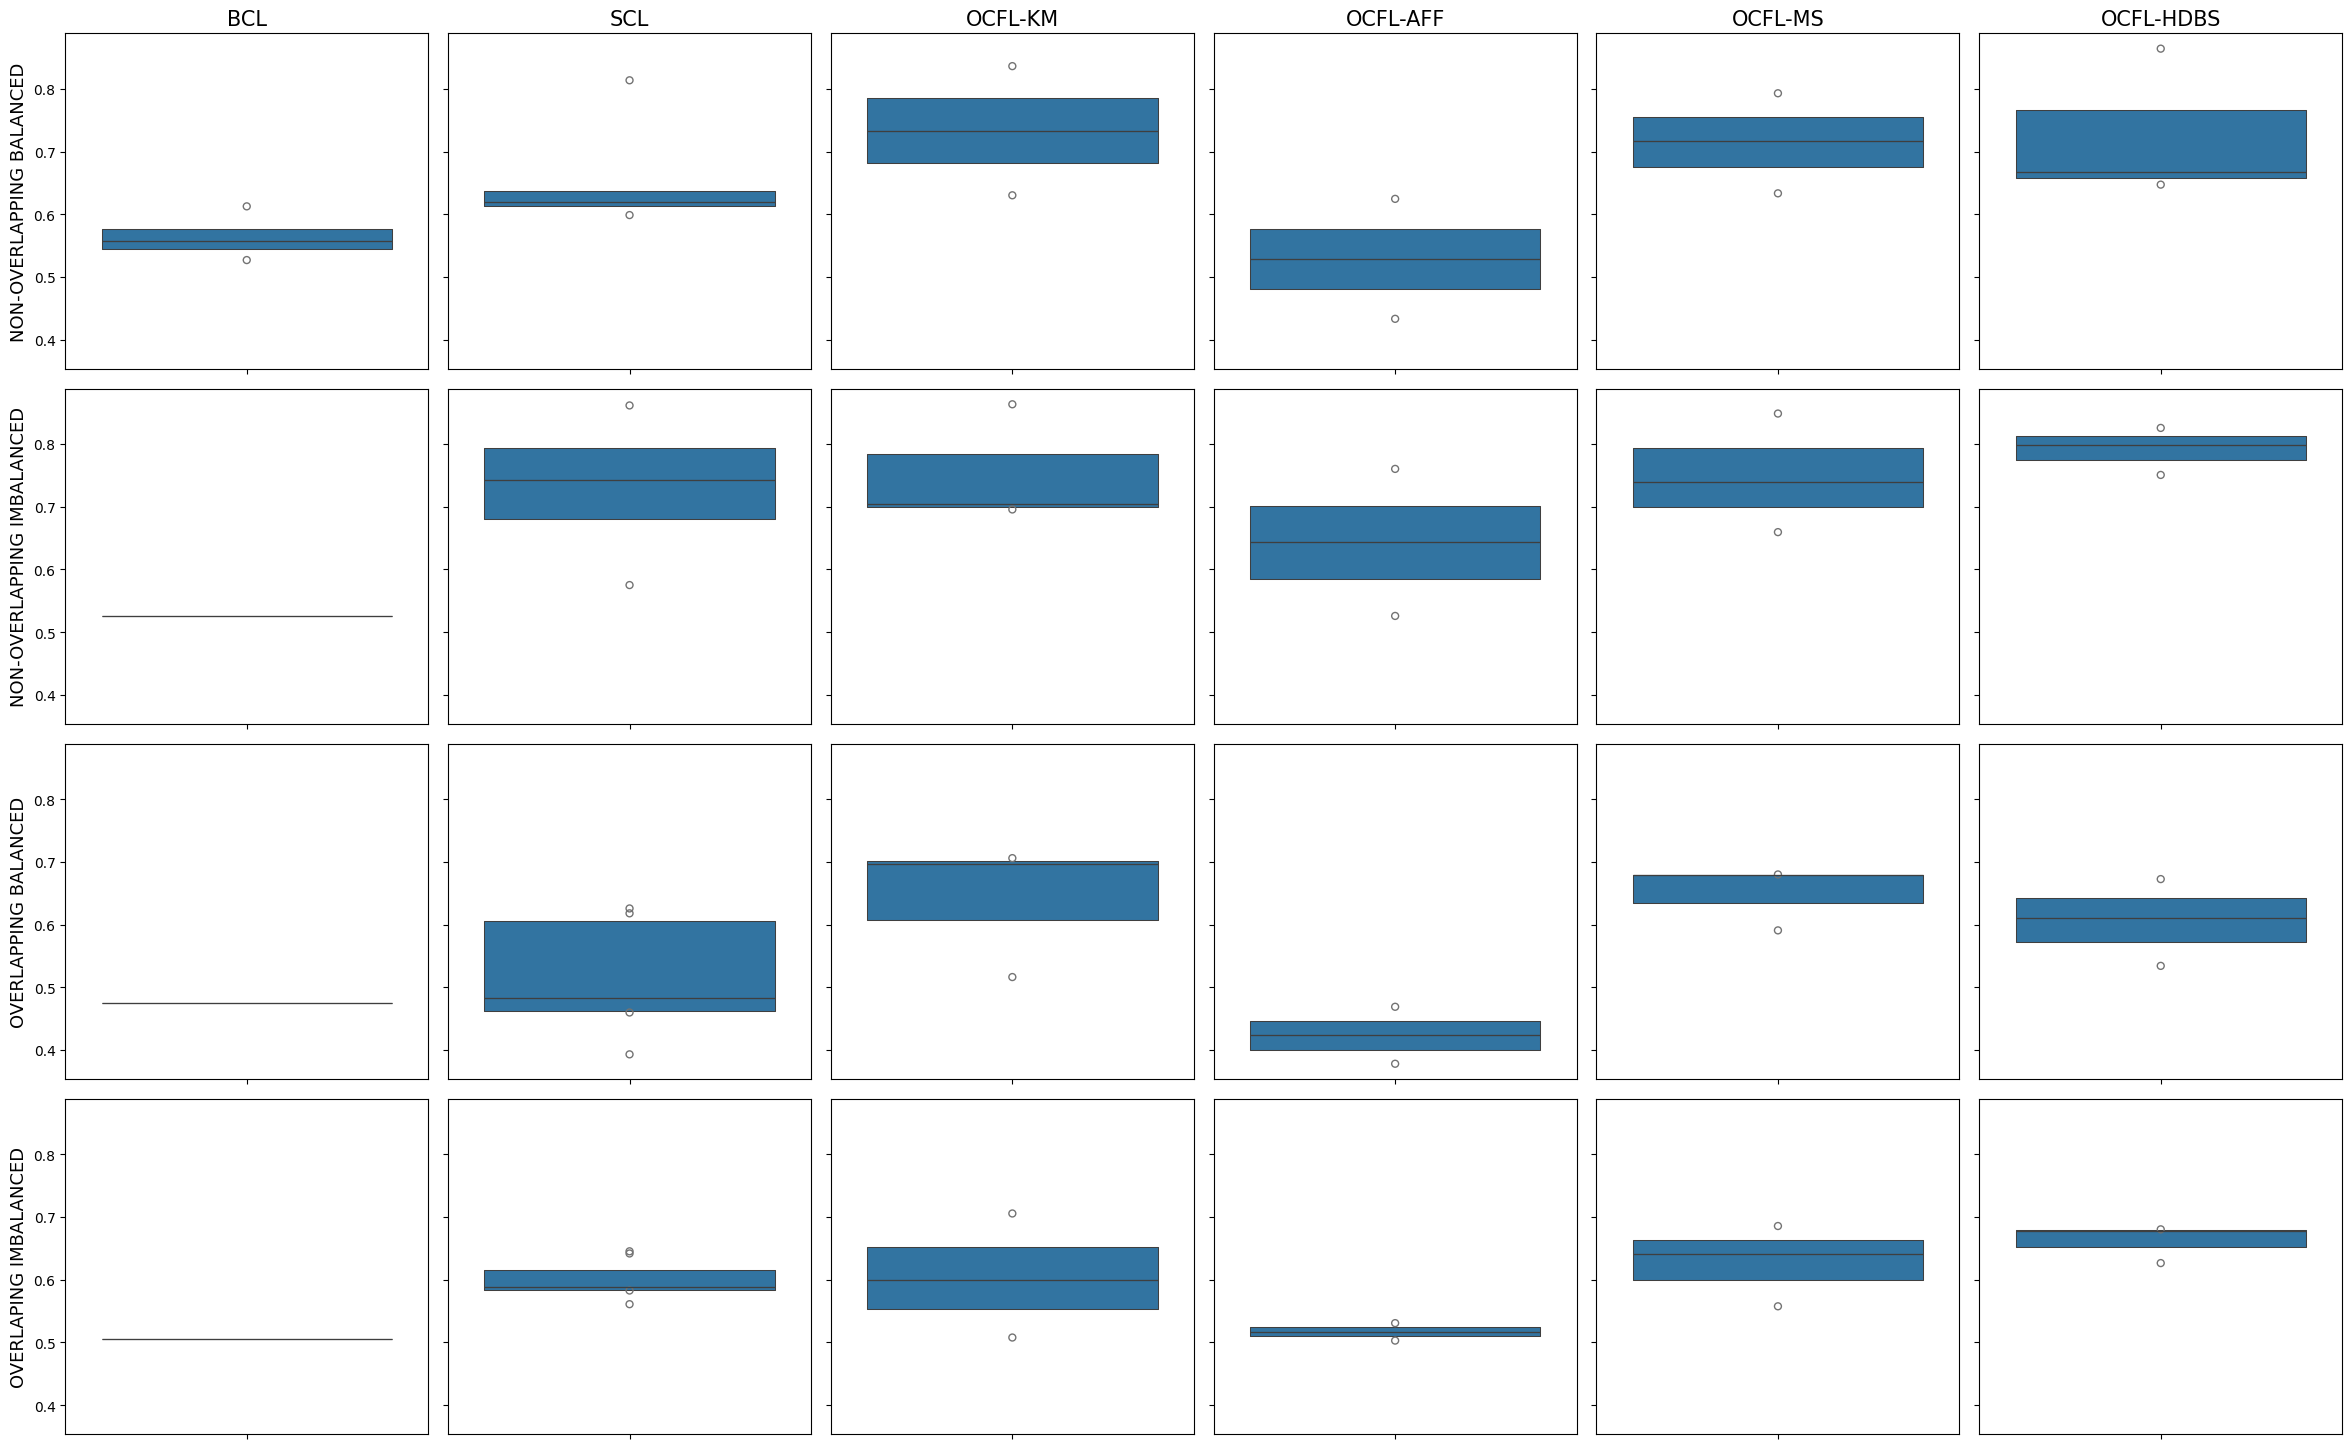

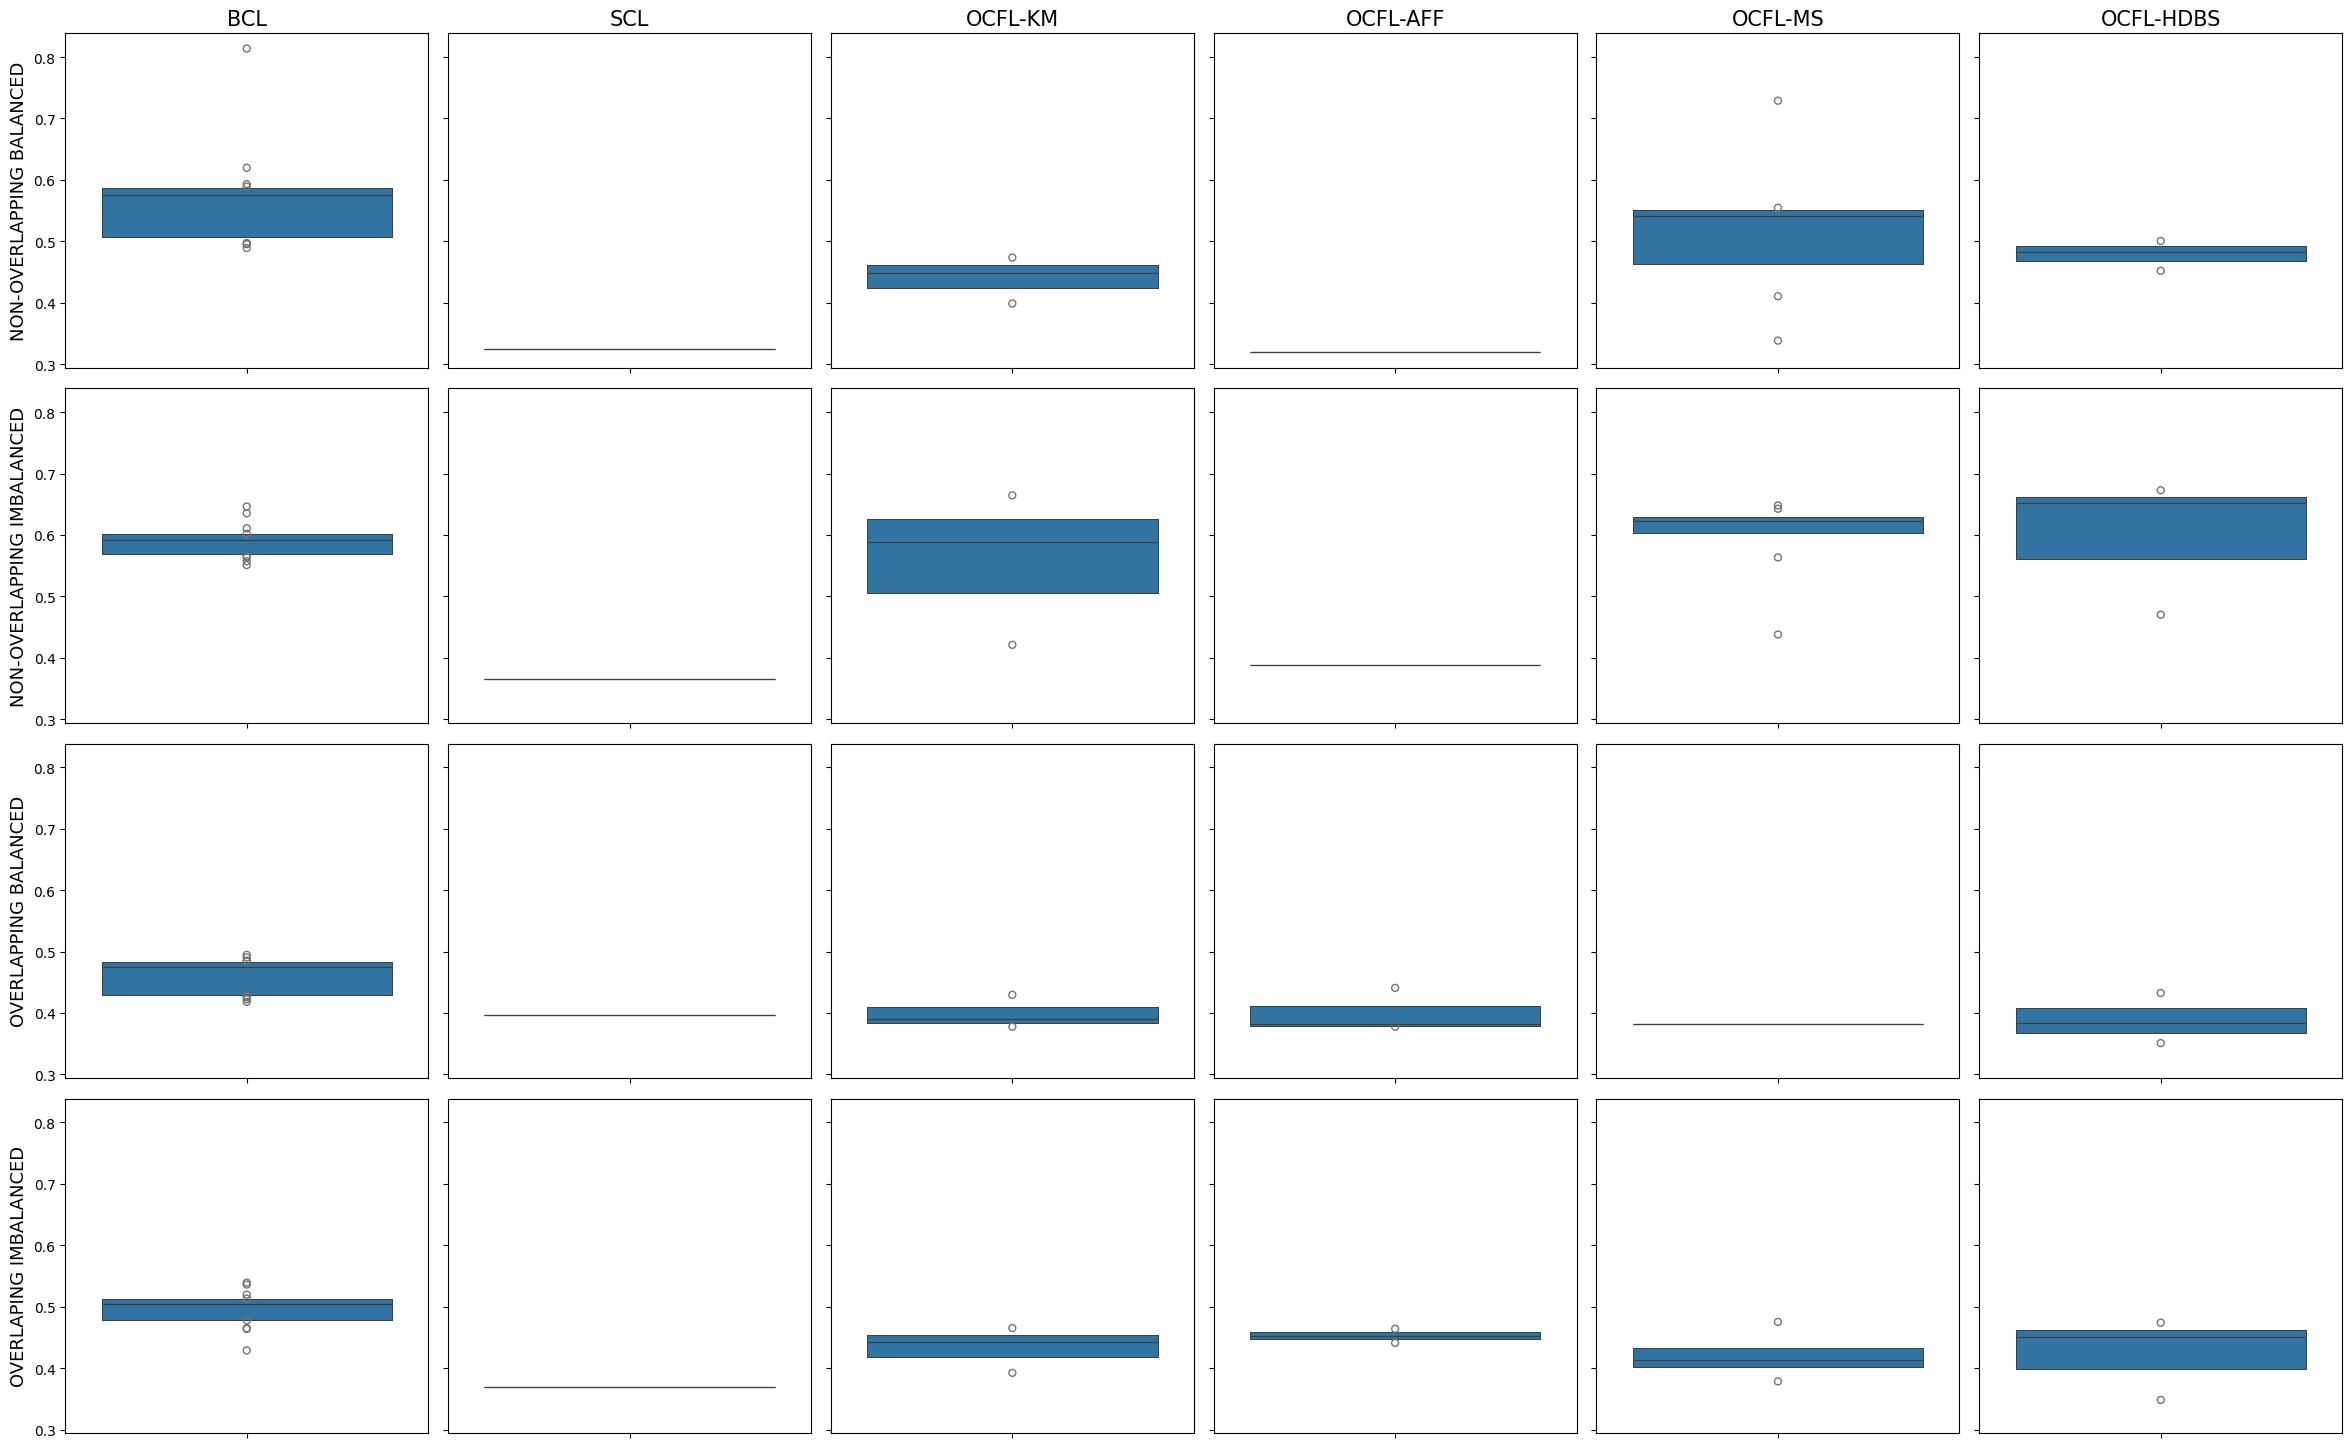

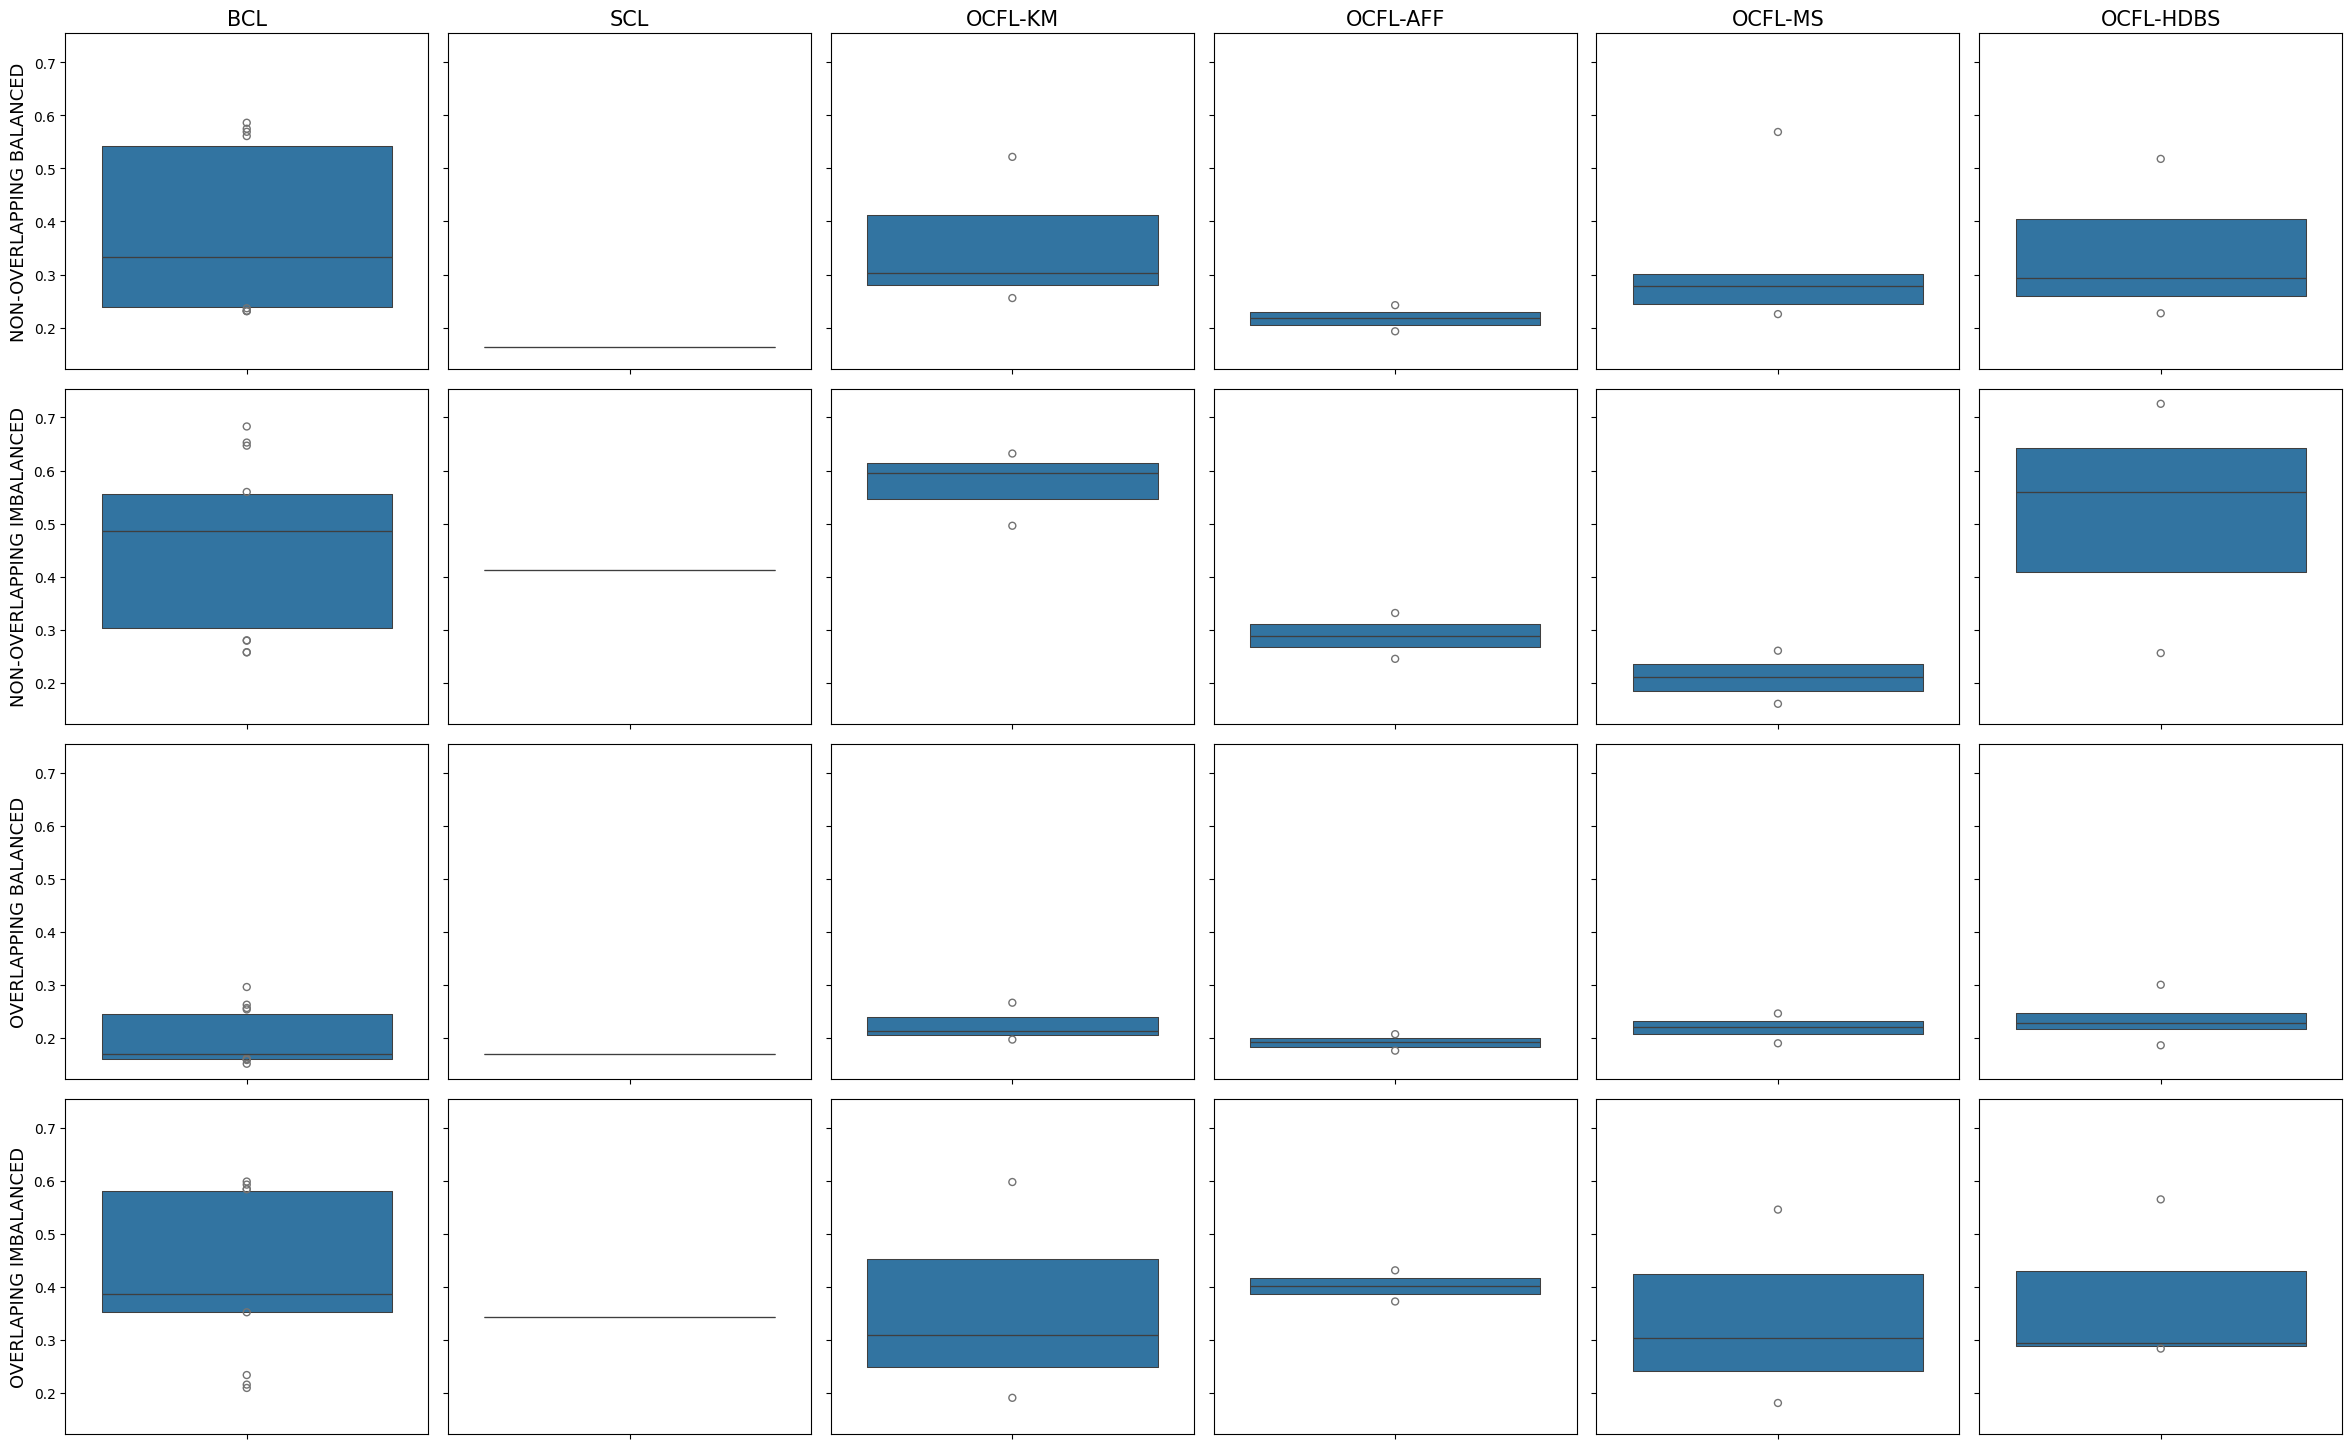

In [24]:
EXPERIMENTS = ['experiment1C']
for experiment in EXPERIMENTS:
    for dataset in DATASETS:
        fig, axes = plt.subplots(4, 6, figsize=SPECIAL_RATIO, sharex=True, sharey=True)
        for row_pos, overlap in enumerate(OVERLAPS):
            for col_pos, algo in enumerate(ALGOS):
                path = os.path.join(EXPERIMENTS_ROOT, experiment, dataset, f'{dataset}_{overlap}_15_{algo}.csv')
                frame = pd.read_csv(path)
                sns.boxenplot(frame['ins_mean'], ax=axes[row_pos, col_pos])
                if row_pos == 0:
                    axes[row_pos, col_pos].set_title(ALGO_NAME_MAPPING[algo], fontsize=TITLE_FONT)
                if col_pos == 0:
                    axes[row_pos, col_pos].set_ylabel(SPLIT_NAME_MAPPING[overlap], fontsize=Y_LABEL_FONT)
        fig.tight_layout()
        fig.savefig(os.path.join(EXPERIMENTS_ROOT, experiment, dataset, 'XAI_histogram.png'))